## Import the following packages

In [312]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import json
import numpy as np


In [234]:
pd.set_option('display.max_columns', None)

## Read in the dataset for with information on the 7th Arrondissement

In [325]:
listing = pd.read_csv('../datasets/arr_7_df.csv', index_col=0)
listing.head()

id                                                name  host_id  \
84    33210                 PERFECT LOCATION! GREAT RATES! BEST    76961   
87    35065                  Lovely Loft Saint-Germain des Pres   150876   
101  151935  Lovely Apt in Heart of Paris: 10min Walk to Louvre   731088   
205  219447       Appartement calme : Eiffel Tower- une chambre   579988   
264  484126                     Apartment with terrace Paris 07  2396369   

     host_since  host_location  host_response_time host_response_rate  \
84   2010-02-03  Paris, France  a few days or more                10%   
87   2010-06-23  Paris, France        within a day                86%   
101  2011-06-22         France      within an hour               100%   
205  2011-05-11  Paris, France             no_data            no_data   
264  2012-05-17  Paris, France             no_data            no_data   

    neighbourhood_cleansed   latitude  longitude                property_type  \
84          Palais-Bourbon  48.856520   2.327960           Entire rental unit   
87          Palais-Bourbon  48.852840   2.325170           Entire rental unit   
101         Palais-Bourbon  48.854095   2.328356           Entire rental unit   
205         Palais-Bourbon  48.860520   2.307640  Private room in rental unit   
264         Palais-Bourbon  48.852780   2.318740           Entire rental unit   

           room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
84   Entire home/apt             2        1.0         1 bath       1.0   1.0   
87   Entire home/apt             2        1.5      1.5 baths       1.0   1.0   
101  Entire home/apt             2        1.0         1 bath       1.0   1.0   
205     Private room             2        2.0        2 baths       2.0   4.0   
264  Entire home/apt             2        1.0         1 bath       1.0   2.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             amenities  \
84                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
87                                                                                                           

In [326]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 84 to 95403
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1400 non-null   int64  
 1   name                         1400 non-null   object 
 2   host_id                      1400 non-null   int64  
 3   host_since                   1400 non-null   object 
 4   host_location                1400 non-null   object 
 5   host_response_time           1400 non-null   object 
 6   host_response_rate           1400 non-null   object 
 7   neighbourhood_cleansed       1400 non-null   object 
 8   latitude                     1400 non-null   float64
 9   longitude                    1400 non-null   float64
 10  property_type                1400 non-null   object 
 11  room_type                    1400 non-null   object 
 12  accommodates                 1400 non-null   int64  
 13  bathrooms            

### Visualising the average daily price of each property type in the 7th Arrondissement

In [327]:
average_daily_rate = listing.groupby('property_type')['price'].mean().reset_index().sort_values(by=('price'), ascending=False)
average_daily_rate.columns = ['Property Type' , 'Average Daily Rate']


In [328]:
average_daily_rate

Property Type  Average Daily Rate
16  Private room in serviced apartment          617.250000
5                          Entire home          570.400000
8            Entire serviced apartment          527.333333
1                      Casa particular          500.000000
0                                 Boat          450.000000
6                          Entire loft          363.692308
7                   Entire rental unit          340.411620
3                         Entire condo          324.656250
17              Room in boutique hotel          311.454545
9                     Entire townhouse          256.800000
10                Entire vacation home          256.000000
12               Private room in condo          245.000000
18                       Room in hotel          214.500000
19          Shared room in rental unit          190.000000
14                Private room in home          170.000000
13         Private room in guest suite          150.000000
15         Private room in rental unit          133.904762
2             Entire bed and breakfast          110.000000
11   Private room in bed and breakfast          103.666667
4                   Entire guest suite           43.000000

## Bar graph showing the property type and average daily rate

### We have decided not to use this graph and as the scope has been narrowed down

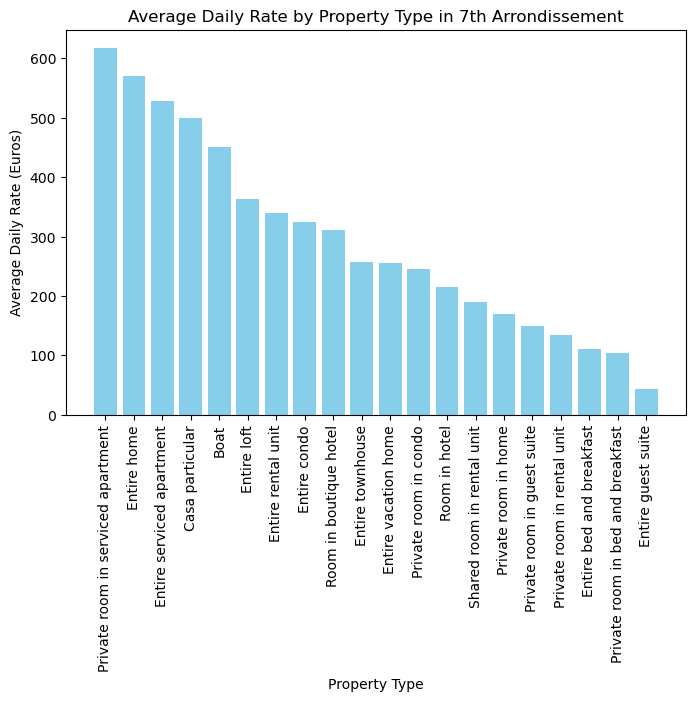

In [329]:
plt.figure(figsize =(8, 5))
plt.bar(average_daily_rate['Property Type'], average_daily_rate['Average Daily Rate'], color = 'skyblue')
plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title('Average Daily Rate by Property Type in 7th Arrondissement')
plt.xticks(rotation=90)
plt.show()

In [487]:
# grouping by the number of bedrooms and calculating the mean price

average_daily_rate_bedrooms = listing.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()
average_daily_rate_bedrooms.columns = ['Property Type' , 'Bedrooms', 'Average Daily Rate']


In [331]:
average_daily_rate_bedrooms

Property Type  Bedrooms  Average Daily Rate
0                                 Boat       2.0          450.000000
1                      Casa particular       1.0          500.000000
2             Entire bed and breakfast       1.0          110.000000
3                         Entire condo       0.0          114.666667
4                         Entire condo       1.0          238.772727
5                         Entire condo       2.0          273.000000
6                         Entire condo       3.0         1650.000000
7                         Entire condo       4.0          400.000000
8                   Entire guest suite       0.0           43.000000
9                          Entire home       1.0          139.333333
10                         Entire home       2.0          320.000000
11                         Entire home       4.0         2114.000000
12                         Entire loft       0.0          300.000000
13                         Entire loft       1.0          229.571429
14                         Entire loft       2.0          530.500000
15                         Entire loft       3.0          699.000000
16                  Entire rental unit       0.0          137.905405
17                  Entire rental unit       1.0          221.233766
18                  Entire rental unit       2.0          504.704724
19                  Entire rental unit       3.0          870.437500
20                  Entire rental unit       4.0          947.230769
21                  Entire rental unit       5.0         1430.750000
22                  Entire rental unit       6.0          150.000000
23           Entire serviced apartment       0.0          506.000000
24           Entire serviced apartment       1.0          344.625000
25           Entire serviced apartment       2.0          587.571429
26           Entire serviced apartment       3.0          895.333333
27                    Entire townhouse       1.0          200.000000
28                    Entire townhouse       2.0          264.500000
29                    Entire townhouse       3.0          355.000000
30                Entire vacation home       1.0          256.000000
31   Private room in bed and breakfast       1.0           92.400000
32   Private room in bed and breakfast       2.0          160.000000
33               Private room in condo       0.0          101.000000
34               Private room in condo       2.0          389.000000
35         Private room in guest suite       1.0          150.000000
36                Private room in home       1.0          170.000000
37         Private room in rental unit       0.0          102.400000
38         Private room in rental unit       1.0          128.333333
39         Private room in rental unit       2.0          197.000000
40  Private room in serviced apartment       1.0          617.250000
41              Room in boutique hotel       1.0          276.700000
42              Room in boutique hotel       2.0          659.000000
43                       Room in hotel       1.0          214.500000
44          Shared room in rental unit       1.0          190.000000

In [333]:
#grouping by bathrooms to get a average daily rate by bathrooms 

average_daily_rate_bathrooms = listing.groupby(['property_type', 'bathrooms'])['price'].mean().reset_index()
average_daily_rate_bathrooms.columns = ['Property Type' , 'Bathrooms', 'Average Daily Rate']

In [334]:
average_daily_rate_bathrooms

Property Type  Bathrooms  Average Daily Rate
0                                 Boat        1.0          450.000000
1                      Casa particular        1.0          500.000000
2             Entire bed and breakfast        1.0          110.000000
3                         Entire condo        1.0          217.916667
4                         Entire condo        1.5          352.500000
5                         Entire condo        2.0         1144.000000
6                         Entire condo        2.5          317.000000
7                   Entire guest suite        1.0           43.000000
8                          Entire home        1.0          139.000000
9                          Entire home        1.5          140.000000
10                         Entire home        3.0          320.000000
11                         Entire home        4.0         2114.000000
12                         Entire loft        1.0          238.375000
13                         Entire loft        1.5          355.000000
14                         Entire loft        2.0          580.666667
15                         Entire loft        2.5          724.000000
16                  Entire rental unit        0.0          135.600000
17                  Entire rental unit        0.5           75.333333
18                  Entire rental unit        1.0          253.147864
19                  Entire rental unit        1.5          329.021053
20                  Entire rental unit        2.0          638.333333
21                  Entire rental unit        2.5          732.475000
22                  Entire rental unit        3.0         1138.300000
23                  Entire rental unit        3.5         1031.888889
24                  Entire rental unit        4.0         1084.800000
25                  Entire rental unit        4.5         2277.000000
26                  Entire rental unit        5.0          552.000000
27                  Entire rental unit        5.5          748.000000
28           Entire serviced apartment        1.0          405.500000
29           Entire serviced apartment        1.5          307.000000
30           Entire serviced apartment        2.0          695.000000
31           Entire serviced apartment        2.5          653.000000
32           Entire serviced apartment        3.0          433.000000
33           Entire serviced apartment        3.5         1084.000000
34                    Entire townhouse        1.0          243.000000
35                    Entire townhouse        1.5          200.000000
36                    Entire townhouse        2.5          355.000000
37                Entire vacation home        1.5          256.000000
38   Private room in bed and breakfast        0.5           95.000000
39   Private room in bed and breakfast        1.0           91.750000
40   Private room in bed and breakfast        1.5          160.000000
41               Private room in condo        1.0          101.000000
42               Private room in condo        1.5          389.000000
43         Private room in guest suite        1.0          150.000000
44                Private room in home        1.0          170.000000
45         Private room in rental unit        0.0          111.000000
46         Private room in rental unit        1.0          117.098039
47         Private room in rental unit        1.5          186.250000
48         Private room in rental unit        2.0          210.000000
49         Private room in rental unit        2.5          443.000000
50  Private room in serviced apartment        1.0          617.250000
51              Room in boutique hotel        1.0          311.454545
52                       Room in hotel        1.0          214.500000
53          Shared room in rental unit        1.5          190.000000

In [336]:
#grouping by the bathrooms to get an average for each bathroom type 

grouped = average_daily_rate_bathrooms.groupby(['Bathrooms']).agg({'Average Daily Rate' : 'mean'}).reset_index()
grouped

Bathrooms  Average Daily Rate
0         0.0          123.300000
1         0.5           85.166667
2         1.0          242.944006
3         1.5          260.433732
4         2.0          653.600000
5         2.5          537.412500
6         3.0          630.433333
7         3.5         1057.944444
8         4.0         1599.400000
9         4.5         2277.000000
10        5.0          552.000000
11        5.5          748.000000

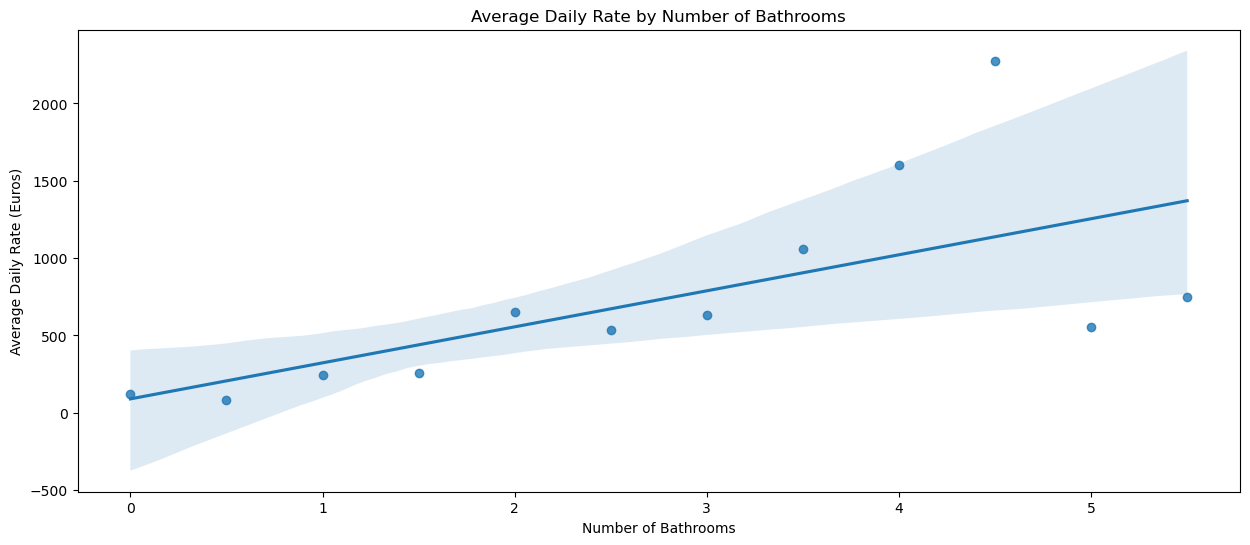

In [337]:
#regplot showing how the average daily rate is impacted by the number of bathrooms 

plt.figure(figsize=(15, 6))

sns.regplot(data = grouped, x = 'Bathrooms', y = 'Average Daily Rate', scatter = True)

plt.title('Average Daily Rate by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Daily Rate (Euros)')

plt.show()

In [338]:
#grouping by the number of bedrooms to get an average daily rate for each bedroom type 
grouped_bedrooms = average_daily_rate_bedrooms.groupby(['Bedrooms']).agg({'Average Daily Rate' : 'mean'}).reset_index()
grouped_bedrooms

Bedrooms  Average Daily Rate
0       0.0          186.424582
1       1.0          239.924682
2       2.0          394.116014
3       3.0          893.954167
4       4.0         1153.743590
5       5.0         1430.750000
6       6.0          150.000000

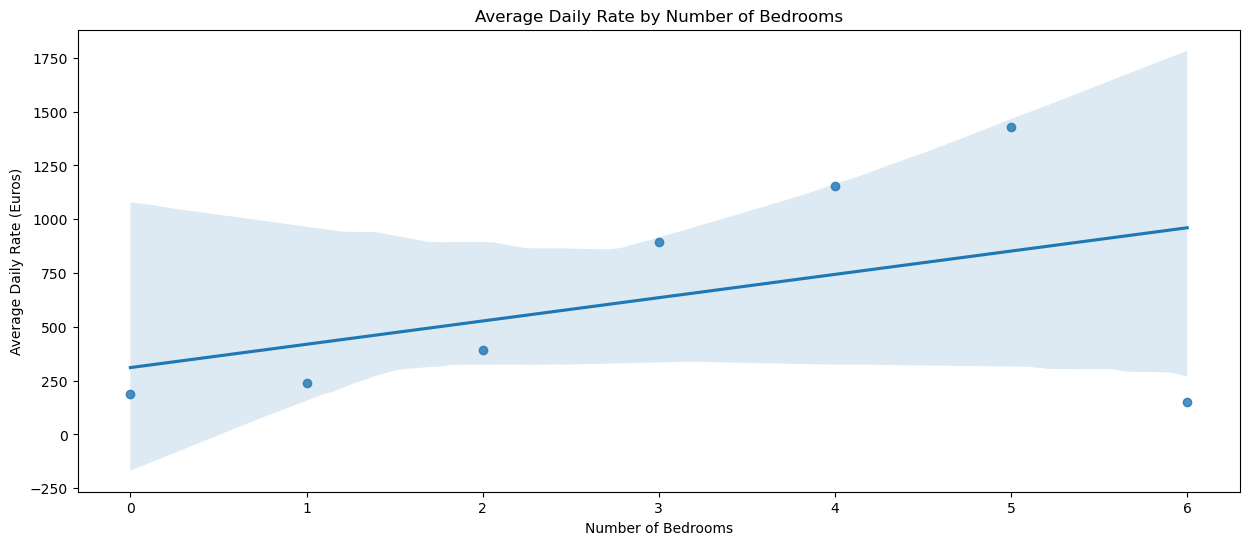

In [339]:
#a regplot showing how average price is impacted by the number of bedrooms 

plt.figure(figsize=(15, 6))

sns.regplot(data = grouped_bedrooms, x = 'Bedrooms', y = 'Average Daily Rate', scatter = True)

plt.title('Average Daily Rate by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Rate (Euros)')

plt.show()

## A heatmap which shows average daily rate by property type and number of bedrooms 

### We have decided not to use this in our report as it does not support our overall analysis. 

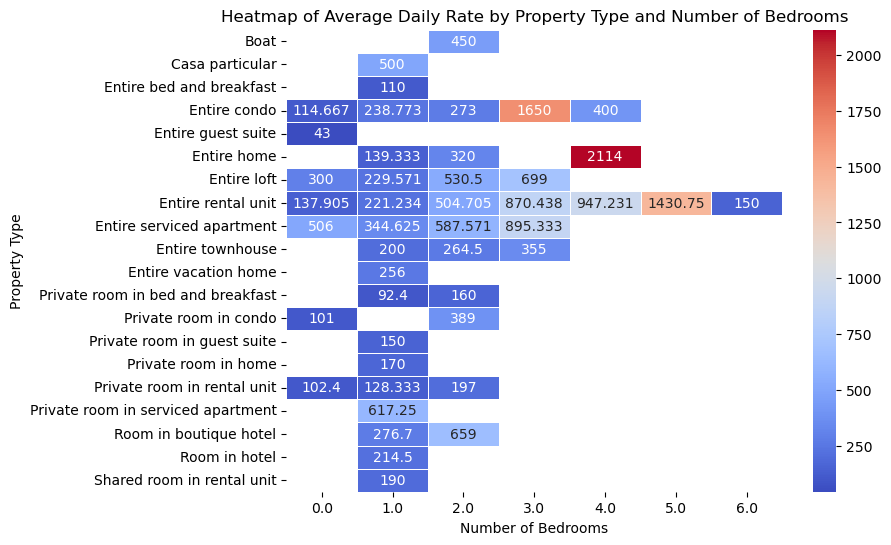

In [340]:
heatmap_data = average_daily_rate_bedrooms.pivot_table(values = 'Average Daily Rate', 
                                                       index = 'Property Type', 
                                                       columns = 'Bedrooms')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm', linewidths=0.5, fmt = 'g')
plt.title('Heatmap of Average Daily Rate by Property Type and Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')


plt.show()

# Filtered for one bedroom and one bathroom based on Ding's analysis

In [341]:
#filtering the dataset to get 1 bedroom and 1 bathroom based of Ding's EDA on the demand and reviews. 
one_bed_one_bath = listing[(listing['bedrooms'] == 1) & (listing['bathrooms'] == 1)]


## Grouped the filtered dataset to see the mean price by property type

In [343]:
grouped_one_bed_one_bath = one_bed_one_bath.groupby(['property_type']).agg({'price' : 'mean'}).reset_index().sort_values(by=['price'], ascending=False)
grouped_one_bed_one_bath

property_type       price
12  Private room in serviced apartment  617.250000
0                      Casa particular  500.000000
6            Entire serviced apartment  345.200000
13              Room in boutique hotel  276.700000
4                          Entire loft  229.571429
5                   Entire rental unit  220.007987
14                       Room in hotel  214.500000
2                         Entire condo  213.500000
7                     Entire townhouse  200.000000
10                Private room in home  170.000000
9          Private room in guest suite  150.000000
3                          Entire home  139.000000
11         Private room in rental unit  117.666667
1             Entire bed and breakfast  110.000000
8    Private room in bed and breakfast   91.750000

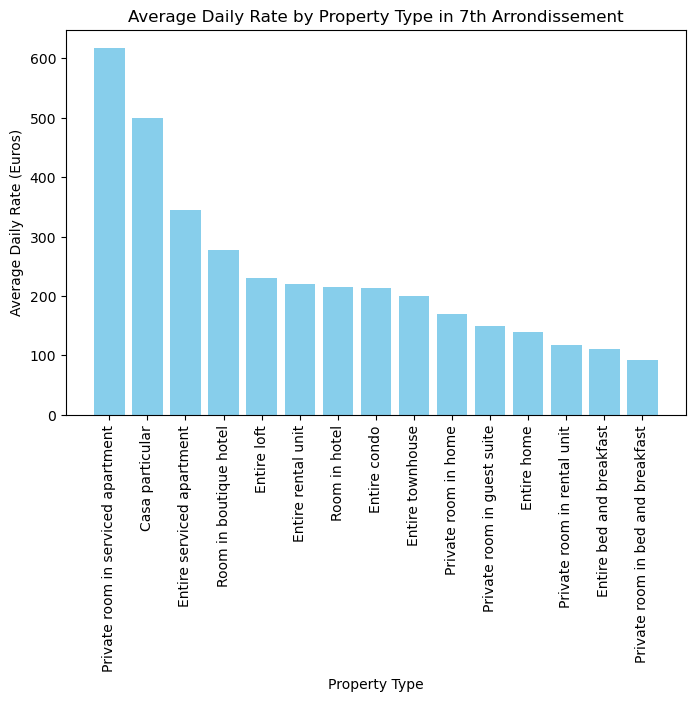

In [344]:
# barplot showing property type and average price for one bedroom and one bathroom listings 
plt.figure(figsize =(8, 5))
plt.bar(grouped_one_bed_one_bath['property_type'], grouped_one_bed_one_bath['price'], color = 'skyblue')
plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title('Average Daily Rate by Property Type in 7th Arrondissement')
plt.xticks(rotation=90)
plt.show()

## Reading in the file with the reviews and listings merged

In [489]:
review_listing = pd.read_csv('../datasets/reviews and listing for 7th Arrondissement.csv', index_col=0)
review_listing.head()

id                                 name  host_id  host_since  \
0  33210  PERFECT LOCATION! GREAT RATES! BEST    76961  2010-02-03   
1  33210  PERFECT LOCATION! GREAT RATES! BEST    76961  2010-02-03   
2  33210  PERFECT LOCATION! GREAT RATES! BEST    76961  2010-02-03   
3  33210  PERFECT LOCATION! GREAT RATES! BEST    76961  2010-02-03   
4  33210  PERFECT LOCATION! GREAT RATES! BEST    76961  2010-02-03   

   host_location  host_response_time host_response_rate  \
0  Paris, France  a few days or more                10%   
1  Paris, France  a few days or more                10%   
2  Paris, France  a few days or more                10%   
3  Paris, France  a few days or more                10%   
4  Paris, France  a few days or more                10%   

  neighbourhood_cleansed  latitude  longitude       property_type  \
0         Palais-Bourbon  48.85652    2.32796  Entire rental unit   
1         Palais-Bourbon  48.85652    2.32796  Entire rental unit   
2         Palais-Bourbon  48.85652    2.32796  Entire rental unit   
3         Palais-Bourbon  48.85652    2.32796  Entire rental unit   
4         Palais-Bourbon  48.85652    2.32796  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             2        1.0         1 bath       1.0   1.0   
1  Entire home/apt             2        1.0         1 bath       1.0   1.0   
2  Entire home/apt             2        1.0         1 bath       1.0   1.0   
3  Entire home/apt             2        1.0         1 bath       1.0   1.0   
4  Entire home/apt             2        1.0         1 bath       1.0   1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                         amenities  \
0  ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
1  ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
2  ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
3  ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
4  ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "L

### Filtering the dataframe for one bedroom and one bathroom 

In [490]:
one_bed_one_bath_reviews = review_listing[(listing['bedrooms'] == 1) & (review_listing['bathrooms'] == 1)]

C:\Users\AbbyParker\AppData\Local\Temp\ipykernel_22648\3748181149.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one_bed_one_bath_reviews = review_listing[(listing['bedrooms'] == 1) & (review_listing['bathrooms'] == 1)]


In [347]:
one_bed_one_bath_reviews['word_count'] = one_bed_one_bath_reviews['comments'].apply(lambda x: len(x)/4)

C:\Users\AbbyParker\AppData\Local\Temp\ipykernel_22648\3112632164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bed_one_bath_reviews['word_count'] = one_bed_one_bath_reviews['comments'].apply(lambda x: len(x)/4)


In [348]:
one_bed_one_bath_reviews.head()

id                                                name  host_id  \
84     33210                 PERFECT LOCATION! GREAT RATES! BEST    76961   
87     33210                 PERFECT LOCATION! GREAT RATES! BEST    76961   
971   151935  Lovely Apt in Heart of Paris: 10min Walk to Louvre   731088   
1025  151935  Lovely Apt in Heart of Paris: 10min Walk to Louvre   731088   
1204  151935  Lovely Apt in Heart of Paris: 10min Walk to Louvre   731088   

      host_since  host_location  host_response_time host_response_rate  \
84    2010-02-03  Paris, France  a few days or more                10%   
87    2010-02-03  Paris, France  a few days or more                10%   
971   2011-06-22         France      within an hour               100%   
1025  2011-06-22         France      within an hour               100%   
1204  2011-06-22         France      within an hour               100%   

     neighbourhood_cleansed   latitude  longitude       property_type  \
84           Palais-Bourbon  48.856520   2.327960  Entire rental unit   
87           Palais-Bourbon  48.856520   2.327960  Entire rental unit   
971          Palais-Bourbon  48.854095   2.328356  Entire rental unit   
1025         Palais-Bourbon  48.854095   2.328356  Entire rental unit   
1204         Palais-Bourbon  48.854095   2.328356  Entire rental unit   

            room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
84    Entire home/apt             2        1.0         1 bath       1.0   1.0   
87    Entire home/apt             2        1.0         1 bath       1.0   1.0   
971   Entire home/apt             2        1.0         1 bath       1.0   1.0   
1025  Entire home/apt             2        1.0         1 bath       1.0   1.0   
1204  Entire home/apt             2        1.0         1 bath       1.0   1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              amenities  \
84                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ["Cooking basics", "Long term stays allowed", "Stove", "Dishes and silverware", "Pocket wifi", "Kitchen", "Fire extinguisher", "Bed linens", "Hangers", "Paid parking off premises", "Clothing storage", "Extra pillows and blankets", "Luggage dropoff allowed", "Heating", "Hot water", "Essentials", "Microwave", "Refrigerator", "Iron", "Bathtub", "Oven", "Smoke alarm", "Coffee maker", "Host greets you", "Hair dryer"]   
87                                                                                                                                        

In [349]:
one_bed_one_bath_reviews['word_count'].sum()

21888.25

# Prompt engineering on the comments

In [273]:
#this is where the apikey goes as this is pushed to github this is removed 


In [274]:
#function to send a prompt to the specified language models and to get its reponse 

def get_completion(prompt, model="gpt-4o-mini", temperature=0):
    """
    Sends a prompt to the specified language model and returns the model's response. 

    Parameters:

    prompt (str): The input prompt containing the task or query you want the model to respond to. 

    model (str): The identifier for the model to be used for generating the completion. 

    temperature (float): Controls the randomnness of the output.
                        A value of 0 makes the model more deterministic, returning the most probable response. 

                        
    Returns:
    str: The content of the reponse generated by the model based on the input prompt. 

    """
    messages = [{"role": "user", "content": prompt}]

    #sends a request to the model with the specified parameters
    response = client.chat.completions.create(   
        model=model,
        messages=messages,
        temperature = temperature
    )

    #returns the content of the response generated by the model
    return response.choices[0].message.content

In [390]:
pd.set_option('display.max_colwidth', None) #sets the display the whole column width 

#sample for the prompt 
sample = review_listing[['id', 'comments']].sample(n = 5, random_state=30)
type(sample)


pandas.core.frame.DataFrame

In [391]:
#function to be called to analyze the comments in a batch 

def analyze_review(sample):
    """
    Analyzes a given review by extracting the listing ID, translating the comment, 
    evaluating sentiment, and identifying key positive and negative words.

    Parameters:
    -----------
    sample : str
        The review text to be analyzed. This text should include the listing ID 
        and the comment to be evaluated. It should be formatted appropriately to 
        enable accurate extraction and analysis.

    Returns:
    --------
    str
        A JSON-formatted string containing the analysis results, including:
        - Listing ID
        - Translated comment
        - Sentiment analysis (positive/negative)
        - Percentage score reflecting the sentiment
        - Key words indicating positive sentiment
        - Key words indicating negative sentiment

        """
    # Define the prompt with the input sample text
    prompt = f"""
Perform the following actions for each individual listing ID, using a dataframe input:

1 - Show each individual listing ID, do not remove any duplicates, if no listing ID is present state that there was no listing ID. 
2 - Translate the whole comment into English, if no comment is available state that there was no comment left. 
3 - Analyze the comment and evaluate how positive or negative it is based on the languaged used. State whether it is positive or negative. 
4 - Assign a percentage score between 0% and 100% where 0% means completely negative and 100% means completely positive. 
Be sure to consider the tone, word choice, and overall sentiment of the review.
If the review contains a mix of both positive and negative elements, provide a balanced score.
If there are no positive key words used, the score should be 0%. 
If there are no negative key words used, the score should be 100%. 
5 - Show me the key words which were used to decide whether the comment was positive, if there were no positive words state no positive words. 
6 - Show me the key words which were used to decide whether the comment was negative, if there were no negative words state no negative words.

Use the following format:
Listing ID: <task1>
Translation: <task 2>
Analysis of comment: <task 3>
Percentage score: <task 4>
Positive key words: <task 5>
Negative key words: <task 6>

Provide the output in a JSON format.

Text:
'''{sample}'''
    """
    
    #Call the get_completion function to obtain the analysis from the model
    return get_completion (prompt)

In [309]:
#result of the sample 
result = analyze_review(sample)
result

'```json\n[\n    {\n        "Listing ID": "2611060",\n        "Translation": "The location of the apartment was fantastic. The Eiffel Tower seemed even closer in real life than in the photos. Everything was well organized. We were allowed to store our luggage downstairs. For the next time, I would have liked to see something like a hairdryer, dish towels, a bottle of shampoo, and those kinds of things. Otherwise, a very nice apartment.",\n        "Analysis of comment": "The comment is mostly positive, highlighting the fantastic location and good organization, but it also includes a suggestion for improvement.",\n        "Percentage score": "80%",\n        "Positive key words": "fantastic, well organized, nice apartment",\n        "Negative key words": "would have liked, suggestion for improvement"\n    },\n    {\n        "Listing ID": "1084643614658197730",\n        "Translation": "Excellent apartment, located very close to the tower, the host responds quickly to all questions. I recom

'[    {        "Listing ID": "2611060",        "Translation": "The location of the apartment was fantastic. The Eiffel Tower seemed even closer in real life than in the photos. Everything was well organized. We were allowed to store our luggage downstairs. For the next time, I would have liked to see something like a hairdryer, dish towels, a bottle of shampoo, and those kinds of things. Otherwise, a very nice apartment.",        "Analysis of comment": "The comment is mostly positive, highlighting the fantastic location and good organization, but it also includes a suggestion for improvement.",        "Percentage score": "80%",        "Positive key words": "fantastic, well organized, very nice",        "Negative key words": "would have liked, suggestion"    },    {        "Listing ID": "1084643614658197730",        "Translation": "Excellent apartment, located very close to the tower, the host responds quickly to all questions. I recommend!",        "Analysis of comment": "The comment i

In [491]:
def clean_json_string(input_string):
    """
    Cleans the input string by removing newline characters and extracting the JSON array
    between the first '[' and the last ']'.
    
    Parameters:
    input_string (str): The string to clean.

    Returns:
    str: The cleaned JSON string or an empty string if no valid JSON is found.
    """
    # Remove newline characters
    clean = input_string.replace('\n', '')
    
    # Find the first and last index of '[' and ']'
    start_index = clean.find('[')
    end_index = clean.rfind(']')
    
    # Check if valid indices are found
    if start_index != -1 and end_index != -1 and start_index < end_index:
        # Extract the substring
        clean = clean[start_index:end_index + 1]


        #remove excessive spaces
        clean = ' '.join(clean.split())
        return clean
    else:
        return ""  # Return an empty string if no valid JSON is found

cleaned_json = clean_json_string(result)
print(cleaned_json)


[ { "Listing ID": "33210", "Translation": "The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....", "Analysis of comment": "The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed, while the negative aspect is the size of the apartment.", "Percentage score": "60%", "Positive key words": ["worth it", "great", "clean"], "Negative key words": ["really small"] }, { "Listing ID": "151935", "Translation": "Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!", "

## Making the sample data into a pandas dataframe

In [300]:
json_data = ''' [    {        "Listing ID": "2611060",        "Translation": "The location of the apartment was fantastic. The Eiffel Tower seemed even closer in real life than in the photos. Everything was well organized. We were allowed to store our luggage downstairs. For the next time, I would have liked to see something like a hairdryer, dish towels, a bottle of shampoo, and those kinds of things. Otherwise, a very nice apartment.",        "Analysis of comment": "The comment is mostly positive, highlighting the fantastic location and good organization, but it also includes a suggestion for improvement.",        "Percentage score": "80%",        "Positive key words": "fantastic, well organized, very nice",        "Negative key words": "would have liked, suggestion"    },    {        "Listing ID": "1084643614658197730",        "Translation": "Excellent apartment, located very close to the tower, the host responds quickly to all questions. I recommend!",        "Analysis of comment": "The comment is very positive, praising the apartment and the responsiveness of the host.",        "Percentage score": "100%",        "Positive key words": "excellent, very close, recommend",        "Negative key words": "no negative words"    },    {        "Listing ID": "1758771",        "Translation": "Nice and cosy place to stay, with great location and neighborhood.",        "Analysis of comment": "The comment is positive, emphasizing the nice and cozy atmosphere as well as the great location.",        "Percentage score": "100%",        "Positive key words": "nice, cosy, great location",        "Negative key words": "no negative words"    },    {        "Listing ID": "18495744",        "Translation": "Very pleasant and responsive.",        "Analysis of comment": "The comment is positive, indicating a pleasant experience and responsiveness.",        "Percentage score": "100%",        "Positive key words": "pleasant, responsive",        "Negative key words": "no negative words"    },    {        "Listing ID": "609234599335906484",        "Translation": "We just loved the apartment because it had beautiful staircases. They are really unique. It is close to public transportation. And it’s so close to the Louvre and also to d’Orsay.",        "Analysis of comment": "The comment is very positive, expressing love for the apartment and its unique features, as well as its convenient location.",        "Percentage score": "100%",        "Positive key words": "loved, beautiful, unique, close",        "Negative key words": "no negative words"    }]'''

In [306]:
data = json.loads(json_data)

comment_analysis = pd.DataFrame(data)

In [307]:
comment_analysis

Listing ID  \
0              2611060   
1  1084643614658197730   
2              1758771   
3             18495744   
4   609234599335906484   

                                                                                                                                                                                                                                                                                                                                                                 Translation  \
0  The location of the apartment was fantastic. The Eiffel Tower seemed even closer in real life than in the photos. Everything was well organized. We were allowed to store our luggage downstairs. For the next time, I would have liked to see something like a hairdryer, dish towels, a bottle of shampoo, and those kinds of things. Otherwise, a very nice apartment.   
1                                                                                                                                                                                                                                                             Excellent apartment, located very close to the tower, the host responds quickly to all questions. I recommend!   
2                                                                                                                                                                                                                                                                                                         Nice and cosy place to stay, with great location and neighborhood.   
3                                                                                                                                                                                                                                                                                                                                              Very pleasant and responsive.   
4                                                                                                                                                                                        We just loved the apartment because it had beautiful staircases. They are really unique. It is close to public transportation. And it’s so close to the Louvre and also to d’Orsay.   

                                                                                                                             Analysis of comment  \
0  The comment is mostly positive, highlighting the fantastic location and good organization, but it also includes a suggestion for improvement.   
1                                                       The comment is very positive, praising the apartment and the responsiveness of the host.   
2                                               The comment is positive, emphasizing the nice and cozy atmosphere as well as the great location.   
3                                                                  The comment is positive, indicating a pleasant experience and responsiveness.   
4                   The comment is very positive, expressing love for the apartment and its unique features, as well as its convenient location.   

  Percentage score                    Positive key words  \
0              80%  fantastic, well organized, very nice   
1             100%      excellent, very close, recommend   
2             100%            nice, cosy, great location   
3             100%                  pleasant, responsive   
4             100%       loved, beautiful, unique, close   

             Negative key words  
0  would have liked, suggestion  
1             no negative words  
2             no negative words  
3             no negative words  
4             no negative words

## Creating a dataframe which only includes the id and the comments to be analyzed

In [381]:
batch = one_bed_one_bath_reviews[['id' , 'comments']]
batch.head()

id  \
84     33210   
87     33210   
971   151935   
1025  151935   
1204  151935   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comments  
84                                                                                                                                                                                                                                                                                                                                                                              Karen’s place was perfect. Yes, it was small and yes, it was up some stairs, but for the price and the location, I wouldn’t hesitate to stay here again. You are right around the corner from a bakery and coffee shop, down the street from countless restaurants, and a very short walk to Musée d’Orsay and the Louvre. It was my first time in Paris (my husband’s second) and it was a dream. Book this place!  
87                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      O apartamento vale pela localização.  A cama é ótima e a roupa de cama e limpa! Mas é realmente pequeno....  
971                                                                                                                                                                                                                                                                                                       Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!  
1025                                                                                                                                                                                        Kevin's apartment is great!  Very centrally located, walking distance from the Musee d'Orsay and Louvre.  There is a Velib bike station around the corner which is great for exploring Paris.  The cafe, Le St Germain, is 100 feet down the road and great for a coffee, glass of wine or dinner.  Apt is roomy, with lots of light and very clean.  Kevin is incredibly helpful and even dropped off a wine bottle opener after we couldnt find one in the apt!   Be aware that it is in true Parisian style a 5 floor walk up, so not for the faint of heart... of those who like to pack a lot!      
1204  Abbiamo soggiornato io e mia nipote R

### Making batches from the above dataframe to be used in with LLMs. 

In [382]:
# Manually assigning batches to variables
batch_1 = batch.iloc[0:50]
batch_2 = batch.iloc[50:100]
batch_3 = batch.iloc[100:150]
batch_4 = batch.iloc[150:200]
batch_5 = batch.iloc[200:250]
batch_6 = batch.iloc[250:300]
batch_7 = batch.iloc[300:350]  # This will include the remaining 35 rows

# Print the results to verify
print("Batch 1:\n", batch_1)
print("\nBatch 2:\n", batch_2)
print("\nBatch 3:\n", batch_3)
print("\nBatch 4:\n", batch_4)
print("\nBatch 5:\n", batch_5)
print("\nBatch 6:\n", batch_6)
print("\nBatch 7:\n", batch_7)

Batch 1:
             id  \
84       33210   
87       33210   
971     151935   
1025    151935   
1204    151935   
1212    484126   
1214    484126   
1315    497821   
1455    629392   
1760    805610   
1784    805610   
1800    805610   
1969    860095   
2010    860095   
2193   1070851   
2320   1024256   
2337   1024256   
2419   1143342   
2476   1143342   
2880   1458447   
3145   1458447   
3214   1458447   
3447   1667079   
3515   1667079   
3626   1769632   
3645   1769632   
3741   1769632   
4118   2074120   
4734   2773082   
4791   2773082   
4891   2773082   
5168   2610613   
5918   3450265   
6041   3472788   
6559   3798626   
6625   4189232   
8056   4421966   
8211   4421966   
8496   5166702   
8747   5367026   
9263   5714292   
9502   5900117   
9856   6041390   
9885   6460564   
10111  6532472   
10243  6717152   
10494  7756345   
10560  7756345   
10563  7756345   
10575  7756345   

                                                                       

In [383]:
#this ensures to show the maximum column and all the rows present
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
batch_1 

id  \
84       33210   
87       33210   
971     151935   
1025    151935   
1204    151935   
1212    484126   
1214    484126   
1315    497821   
1455    629392   
1760    805610   
1784    805610   
1800    805610   
1969    860095   
2010    860095   
2193   1070851   
2320   1024256   
2337   1024256   
2419   1143342   
2476   1143342   
2880   1458447   
3145   1458447   
3214   1458447   
3447   1667079   
3515   1667079   
3626   1769632   
3645   1769632   
3741   1769632   
4118   2074120   
4734   2773082   
4791   2773082   
4891   2773082   
5168   2610613   
5918   3450265   
6041   3472788   
6559   3798626   
6625   4189232   
8056   4421966   
8211   4421966   
8496   5166702   
8747   5367026   
9263   5714292   
9502   5900117   
9856   6041390   
9885   6460564   
10111  6532472   
10243  6717152   
10494  7756345   
10560  7756345   
10563  7756345   
10575  7756345   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     comments  
84                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [495]:
#calling the analyze review function on batch 1
result_1 = analyze_review(batch_1)
print("Completion: ")
print(result_1)

Completion: 
```json
[
    {
        "Listing ID": 33210,
        "Translation": "The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....",
        "Analysis of comment": "The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed and bedding, while the negative aspect is the small size of the apartment.",
        "Percentage score": "70%",
        "Positive key words": ["location", "great", "clean"],
        "Negative key words": ["small"]
    },
    {
        "Listing ID": 151935,
        "Translation": "Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fal

In [496]:
#cleaning the string to be made into a pandas dataframe 
cleaned_1 = clean_json_string(result_1)
cleaned_1

'[ { "Listing ID": 33210, "Translation": "The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....", "Analysis of comment": "The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed and bedding, while the negative aspect is the small size of the apartment.", "Percentage score": "70%", "Positive key words": ["location", "great", "clean"], "Negative key words": ["small"] }, { "Listing ID": 151935, "Translation": "Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d\'Orsay, by foot. Metro Station is really close, so we didn\'t have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apar

In [497]:
json_data1 = '''[ { "Listing ID": 33210, "Translation": "The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....", "Analysis of comment": "The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed and bedding, while the negative aspect is the small size of the apartment.", "Percentage score": "70%", "Positive key words": ["location", "great", "clean"], "Negative key words": ["small"] }, { "Listing ID": 151935, "Translation": "Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d\'Orsay, by foot. Metro Station is really close, so we didn\'t have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!", "Analysis of comment": "The comment is overwhelmingly positive, highlighting the great location, cozy apartment, and overall satisfaction with the stay.", "Percentage score": "95%", "Positive key words": ["great", "perfect", "cosy", "everything we need", "fall in love", "great"], "Negative key words": ["small"] }, { "Listing ID": 484126, "Translation": "We stayed at Kevin\'s place from August 13 to 18 and everything was perfect! Although we never met Kevin, he was always quick and available for our information requests. The house reflects the description, plus there was a small sofa in the bedroom. The location of the house is really amazing, just a few meters from the Rue du Bac Metro station and the bus stop. However, we preferred to walk to reach all the major destinations (Pompidou, Les Halles, Louvre, Opera, Gare d\'Orsay, etc.) to enjoy the city and the walk along the Seine. There were many bars, restaurants, and supermarkets in the area. In short, a great experience... we will gladly return in another season. :-)))", "Analysis of comment": "The comment is very positive, emphasizing the perfect stay, great location, and overall satisfaction.", "Percentage score": "100%", "Positive key words": ["perfect", "amazing", "great experience"], "Negative key words": "no negative words" }, { "Listing ID": 497821, "Translation": "Paris was amazing!! (Of course). Berenice\'s apartment was incredibly nice and in a perfect location. Everything was all prepared for me when I arrived including some food to get me started. Berenice was very helpful and quick to respond about anything that I needed. I hope to see her again someday! Highly recommend.", "Analysis of comment": "The comment is highly positive, praising the apartment, location, and the host\'s helpfulness.", "Percentage score": "100%", "Positive key words": ["amazing", "incredibly nice", "perfect location", "helpful", "highly recommend"], "Negative key words": "no negative words" }, { "Listing ID": 629392, "Translation": "Sophie\'s space is absolutely perfect for anyone wanting to enjoy a real Paris experience. The location is perfect, getting to walk home from the Metro and be able to say goodnight to the Eiffel tower as you walk into her apartment was amazing. You want to stay here, trust me.", "Analysis of comment": "The comment is very positive, highlighting the perfect location and overall experience.", "Percentage score": "100%", "Positive key words": ["perfect", "amazing", "real Paris experience"], "Negative key words": "no negative words" }, { "Listing ID": 805610, "Translation": "My husband and I stayed at Maia\'s apartment for 3 nights. We know the area very well and that is the reason we wanted to stay there. Pros: 1. Lovely quiet residential area & very close to all the tourist spots, nice local shops, cafes & boulangeries. 2. Maia was lovely to deal with and helpful with check out time. 3. Apartment was tidy. the cleaner was there to hand in the key and to help us to set up the bed. Cons: 1. Apartment is really small (as described) and because the sofa bed was difficult to fold in and out, we had to leave it as a bed. that made the apartment smaller. 2. A narrow & steep 75 steps. so you better travel light!! 3. Outside toilet: a bit of inconvenience. Overall we liked the place a lot. we will definitely go back again.", "Analysis of comment": "The comment contains both positive and negative elements. The positives include the lovely area, helpful host, and tidiness, while the negatives focus on the small size and inconvenience of the layout.", "Percentage score": "65%", "Positive key words": ["lovely", "helpful", "tidy"], "Negative key words": ["small", "inconvenience"] }, { "Listing ID": 860095, "Translation": "We had the opportunity to be in Maia\'s house, we really enjoy the apartment. Located in the center of Paris, just walking you will see the Louvre, Orseix, Notredamm, etc... 100% Recomendable!", "Analysis of comment": "The comment is very positive, emphasizing enjoyment of the apartment and its central location.", "Percentage score": "100%", "Positive key words": ["enjoy", "100% Recomendable"], "Negative key words": "no negative words" }, { "Listing ID": 1070851, "Translation": "The apartment is quiet and safe. It was close to the Eiffel tower. She left us a bottle of wine and we had coffee every morning.", "Analysis of comment": "The comment is positive, highlighting the quietness, safety, and thoughtful gestures from the host.", "Percentage score": "85%", "Positive key words": ["quiet", "safe", "bottle of wine", "coffee"], "Negative key words": "no negative words" }, { "Listing ID": 1024256, "Translation": "A cute little studio tucked away in an amazing location. We had everything we could have asked for and more. Plenty of room for two. Heaps of restaurants and things to do within walking distance. Would stay again.", "Analysis of comment": "The comment is very positive, praising the location and amenities.", "Percentage score": "90%", "Positive key words": ["cute", "amazing location", "everything we could have asked for", "plenty of room", "would stay again"], "Negative key words": "no negative words" }, { "Listing ID": 1143342, "Translation": "The location was quiet and safe, and there were many pretty shops nearby! Nick informed us about nearby restaurants, bars, and bakeries when we were an hour late for check-in. However, the bed is small... 170cm is tight. It might be difficult for taller men. The bathroom is also small. It is a recommended place for two people to stay for a short time.", "Analysis of comment": "The comment has both positive and negative elements. The positives include the quiet and safe location and helpful host, while the negatives focus on the small bed and bathroom.", "Percentage score": "60%", "Positive key words": ["quiet", "safe", "recommended"], "Negative key words": ["small", "tight", "difficult"] }, { "Listing ID": 1458447, "Translation": "Very nice apartment, quiet, clean, and very functional in a nice neighborhood. It is ideally located in the heart of Paris. We will definitely return.", "Analysis of comment": "The comment is very positive, emphasizing the quality and location of the apartment.", "Percentage score": "100%", "Positive key words": ["nice", "quiet", "clean", "functional", "ideally located", "definitely return"], "Negative key words": "no negative words" }, { "Listing ID": 1667079, "Translation": "My family and I love how everything was so easily accessible and how comfortable it was. Seriously enjoyed being very close to everything 😊", "Analysis of comment": "The comment is positive, highlighting accessibility and comfort.", "Percentage score": "90%", "Positive key words": ["easily accessible", "comfortable", "enjoyed"], "Negative key words": "no negative words" }, { "Listing ID": 1769632, "Translation": "Gilles and his wife met us as soon as we arrived. He had wine and cheese and bread waiting for us in the apartment. Everything about the AMAZING location you have read from other reviewers is true. It was close to absolutely everything. Gilles offered helpful tips on how to get around. The place was very clean and oh so wonderfully quiet. It always felt safe there too with the closed courtyard. Plenty of hot water and clean towels. The little kitchen has nice things stocked in it like tea, sugar, and butter. Any questions we had were quickly answered. I cannot think of a better place to stay and if we ever come back to Paris we will be staying with Gilles.", "Analysis of comment": "The comment is overwhelmingly positive, praising the location, cleanliness, and host\'s hospitality.", "Percentage score": "100%", "Positive key words": ["AMAZING", "helpful", "clean", "quiet", "safe"], "Negative key words": "no negative words" }, { "Listing ID": 2074120, "Translation": "The property has an unusual layout but very doable for me, my sister, and our friend. We had a fantastic time and the deck of course is amazing. It was a wonderful stay and I highly recommend it.", "Analysis of comment": "The comment is positive, highlighting a fantastic time and recommending the place despite the unusual layout.", "Percentage score": "85%", "Positive key words": ["fantastic", "amazing", "wonderful", "highly recommend"], "Negative key words": ["unusual layout"] }, { "Listing ID": 2773082, "Translation": "Excellent location, spectacular view of the Eiffel Tower. Central to everything in Paris, and great restaurants. Highly recommend.", "Analysis of comment": "The comment is very positive, emphasizing the excellent location and view.", "Percentage score": "100%", "Positive key words": ["excellent", "spectacular", "highly recommend"], "Negative key words": "no negative words" }, { "Listing ID": 2610613, "Translation": "Great location right next to Rue Cler.", "Analysis of comment": "The comment is positive, highlighting the great location.", "Percentage score": "90%", "Positive key words": ["great location"], "Negative key words": "no negative words" }, { "Listing ID": 3450265, "Translation": "Very good location, everything we need nearby. Airy, relaxing neighborhood, pleasant to live in. Easy access apartment, practical and clean.", "Analysis of comment": "The comment is very positive, emphasizing the location and cleanliness.", "Percentage score": "100%", "Positive key words": ["very good location", "everything we need", "clean"], "Negative key words": "no negative words" }, { "Listing ID": 3472788, "Translation": "Pierre-Louis\'s apartment is a true nest of comfort in the heart of the 7th, ideally located between neighborhood supermarkets, bakeries, and grocery stores, while being close to the Seine and several metro stations. The descriptions and photos on the Airbnb page are very representative of the accommodation. The apartment is quiet, bright, and very comfortable - perfect for short tourist visits or extended work stays. Pierre-Louis is a remarkable host, who welcomed me in person on a Sunday evening and made sure I was comfortable for 5 days.", "Analysis of comment": "The comment is overwhelmingly positive, praising the comfort, location, and host\'s hospitality.", "Percentage score": "100%", "Positive key words": ["true nest of comfort", "ideally located", "quiet", "bright", "very comfortable", "remarkable host"], "Negative key words": "no negative words" }, { "Listing ID": 3798626, "Translation": "Thierry\'s home was exactly as pictured. Spacious, with plenty of natural light, and surprisingly quiet given the popular area. Right by one of the best spots for getting close to the Eiffel Tower. Thierry responds promptly, offering suggestions for spots to check out in the area.", "Analysis of comment": "The comment is positive, highlighting the spaciousness, light, and host\'s responsiveness.", "Percentage score": "90%", "Positive key words": ["exactly as pictured", "spacious", "natural light", "quiet", "responds promptly"], "Negative key words": "no negative words" }, { "Listing ID": 4189232, "Translation": "Had a great visit to Paris and staying here for the second time. After my previous stay in this studio in Oct 2014, I didn\'t even look for any other place. I plan to come back next year to stay here again. Arielle and her sons are great hosts. They are flexible and are always willing to help out. They are very accommodating and personable. Couldn\'t have asked to stay at a better place. Great location and very close to 2 metro stations.", "Analysis of comment": "The comment is very positive, emphasizing the great experience and host\'s hospitality.", "Percentage score": "100%", "Positive key words": ["great visit", "great hosts", "flexible", "accommodating", "great location"], "Negative key words": "no negative words" }, { "Listing ID": 4421966, "Translation": "Great experience! Located in the heart of Paris just next to some famous monuments. The houseboat is wonderfully charming, perfect for 2(+1) people.", "Analysis of comment": "The comment is very positive, highlighting the great experience and charm of the houseboat.", "Percentage score": "100%", "Positive key words": ["great experience", "wonderfully charming", "perfect"], "Negative key words": "no negative words" }, { "Listing ID": 5166702, "Translation": "Just incredibly unique to live in the heart of Paris from the sailor\'s point of view. Just awesome.", "Analysis of comment": "The comment is very positive, emphasizing the uniqueness and awesomeness of the experience.", "Percentage score": "100%", "Positive key words": ["incredibly unique", "awesome"], "Negative key words": "no negative words" }, { "Listing ID": 5367026, "Translation": "The apartment was very well located, but during the entire stay, we couldn\'t get the sound of the television to work. Also, the host told us that there would be towels for 4 people, and when we arrived, there were only two medium towels. When we indicated this, she said they hadn\'t had time to prepare more towels. No one accompanied us to the apartment; we had to pick up the keys at a nearby store where a friend of the host works. Overall, the apartment was fine, but the host\'s availability was only possible by phone.", "Analysis of comment": "The comment contains both positive and negative elements. The positive aspect is the location, while the negatives focus on the issues with the television, towels, and host\'s availability.", "Percentage score": "50%", "Positive key words": ["very well located"], "Negative key words": ["couldn\'t get the sound", "only two towels", "no one accompanied us", "availability only by phone"] }, { "Listing ID": 5714292, "Translation": "A dive into the Parisian neighborhood life that we love so much.", "Analysis of comment": "The comment is positive, emphasizing the enjoyment of the Parisian neighborhood life.", "Percentage score": "80%", "Positive key words": ["dive into", "love"], "Negative key words": "no negative words" }, { "Listing ID": 5900117, "Translation": "Great location!", "Analysis of comment": "The comment is positive, simply highlighting the great location.", "Percentage score": "90%", "Positive key words": ["great location"], "Negative key words": "no negative words" }, { "Listing ID": 6041390, "Translation": "The location is good and we had a pleasant time.", "Analysis of comment": "The comment is positive, highlighting the good location and pleasant experience.", "Percentage score": "85%", "Positive key words": ["good location", "pleasant time"], "Negative key words": "no negative words" }, { "Listing ID": 6460564, "Translation": "Isabelle and Bruno made our family very welcome on our trip to Paris! Their wonderful light-filled apartment is centrally located but also in a quiet neighborhood. We were so excited to see that it was on the same street as the Musee D\'Orsay, probably the most amazing museum in the world. The apartment is close to two Metro stations for easy access around the city, we walked to most of the most famous landmarks and especially enjoyed the vast choice of restaurants in the area. With maps on hand at the apartment and some great recommendations for sightseeing from our hosts, we had a wonderful time!", "Analysis of comment": "The comment is overwhelmingly positive, praising the hosts, location, and overall experience.", "Percentage score": "100%", "Positive key words": ["very welcome", "wonderful", "centrally located", "quiet", "amazing", "great recommendations"], "Negative key words": "no negative words" }, { "Listing ID": 6532472, "Translation": "My boyfriend and I stayed for 3 nights and had a great time here! The breakfast and mini fridge were really helpful and the location couldn\'t be better (we walked everywhere). Others should note that it\'s up quite a few flights of stairs, the bathroom is shared with a hallway of rooms so you can\'t keep anything there (we never saw anyone though) and the shower and the room are quite small so larger people may find it uncomfortable. We\'re young and not too fussy so it was fine and the good outweighed the bad for us, but I can see older or larger people finding it a bit cramped. Isa is wonderful and so responsive and helpful, thanks for everything!", "Analysis of comment": "The comment contains both positive and negative elements. The positives include the great time, helpful amenities, and responsive host, while the negatives focus on the small size and shared bathroom.", "Percentage score": "70%", "Positive key words": ["great time", "helpful", "wonderful", "responsive"], "Negative key words": ["small", "shared bathroom", "cramped"] }, { "Listing ID": 6717152, "Translation": "Delightful neighborhood, lovely and artfully-decorated space, and a wonderful and proactive host!", "Analysis of comment": "The comment is very positive, praising the neighborhood, space, and host.", "Percentage score": "100%", "Positive key words": ["delightful", "lovely", "wonderful", "proactive"], "Negative key words": "no negative words" }, { "Listing ID": 7756345, "Translation": "\\"Stunning magic view on Eiffel tower\\" a perfect description of the place. The location is about 5 minutes away from the Eiffel tower, cafes, restaurants, grocery, laundry, and transportation. The place is clean and the host is really nice. We would stay again.", "Analysis of comment": "The comment is overwhelmingly positive, emphasizing the stunning view and cleanliness.", "Percentage score": "100%", "Positive key words": ["stunning", "perfect", "clean", "really nice"], "Negative key words": "no negative words" }, { "Listing ID": 7756345, "Translation": "We had a lovely time! William you have an excellent location with a great view. Thanks so much! Looking forward to another stay in the future! Take care.", "Analysis of comment": "The comment is very positive, highlighting the excellent location and great view.", "Percentage score": "100%", "Positive key words": ["lovely time", "excellent location", "great view"], "Negative key words": "no negative words" }, { "Listing ID": 7756345, "Translation": "Fabulous HOST (William) STUNNING views, lovely neighborhood, convenient and safe location and a flat that was perfect for our family. If you are reading this review you are probably like me. I spent hours looking for the perfect flat with the best views in the safest neighborhood for my family\'s \'once in a lifetime\' trip to Europe. I stumbled upon Airbnb by accident and so glad I did. As soon as I saw William\'s \'stunning Eiffel View\' flat and after my first conversation with him I knew I had found the perfect place for my family to stay. First off - anyone who rents from William will be getting first-class attention. And trust me when I say I am sure I drove him crazy with all my questions. It was our first European vacation and I had many questions. He ALWAYS responded back promptly even with the time difference. Not only did William respond back quickly but he answered all my questions thoroughly and gave my family a lot of extra tips. From restaurant recommendations to transportation - even how to buy tickets for the French Open. Anything I ask he had an answer or researched for us. One of our most pleasant surprises was that William was there to meet us when we arrived - such a treat. It was so nice to put a name with a face. He showed us around the flat and was on his way. We were even delighted when we ran into him in Paris on the way to dinner one night - once again he gave us more recommendations on things to do that next day. So if you are looking for a Host who goes above and beyond William is that person. Now onto the flat! The views of the Eiffel Tower were definitely one of the highlights. The first night when the lights came on I immediately sent William a text - we were so amazed. Then when they start twinkling you are overwhelmed that you could possibly be seeing this. Each night my family would wait for the lights to come on and we all grabbed our cameras to take pictures and videos. My son was the lucky one who got to sleep on the mattress with the shutters open and watch the lights until he fell asleep. The flat is totally as described. It was perfect for our family of three - two adults and a 15-year-old. Although another teenager or adult could share the mattress and it would work fine. We were not in the flat except to sleep so it was great for us. We used the washer which was so convenient but did not cook- as there were so many fabulous places to eat within minutes. The neighborhood was safe and the locals were all so nice to us. I totally felt safe letting my teenager go to the bakery close by. The flat is also in a very secure building.", "Analysis of comment": "The comment is overwhelmingly positive, praising the host, views, and overall experience.", "Percentage score": "100%", "Positive key words": ["fabulous", "stunning", "perfect", "first-class attention", "amazed", "highlights", "safe"], "Negative key words": "no negative words" }]'''

In [498]:
#loading the json file and converting it into a dataframe 
data = json.loads(json_data1)

comment_analysis1 = pd.DataFrame(data)

In [499]:
comment_analysis1

Listing ID  \
0        33210   
1       151935   
2       484126   
3       497821   
4       629392   
5       805610   
6       860095   
7      1070851   
8      1024256   
9      1143342   
10     1458447   
11     1667079   
12     1769632   
13     2074120   
14     2773082   
15     2610613   
16     3450265   
17     3472788   
18     3798626   
19     4189232   
20     4421966   
21     5166702   
22     5367026   
23     5714292   
24     5900117   
25     6041390   
26     6460564   
27     6532472   
28     6717152   
29     7756345   
30     7756345   
31     7756345   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Translation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## Run batch 2

In [404]:
batch_2

id  \
10891   8324894   
11106   8735023   
11208   9243315   
12364  11843815   
12384  11843815   
12495  12066652   
12877  12257692   
12930  12257692   
13790  13072178   
13804  13072178   
13870  13072178   
14133  13152868   
14134  13152868   
14550  13308418   
14554  13308418   
14564  13308418   
14579  13308418   
14582  13308418   
14814  13308703   
15731  14727400   
16174  15022342   
16239  15580160   
16480  15837585   
16822  15710140   
16911  15878157   
17096  15878157   
17109  15878157   
17156  16288098   
17168  16288098   
17281  16675913   
17307  16675913   
17399  16874296   
17485  16874296   
17738  17231407   
18050  17132314   
18625  18232933   
19055  18495744   
19412  18310832   
19654  20023772   
20214  21654678   
20348  21664630   
20415  21525697   
20807  23710971   
20808  23710971   
20809  23710971   
20820  23710971   
21258  25276985   
21673  25338792   
21790  25338792   
22128  26269733   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comments  
10891                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.  
11106                                                                                                                                                                                                                                                                                                                                                                                                    

In [405]:
result_2 = analyze_review(batch_2)
print("Completion: ")
print(result_2)

Completion: 
```json
[
    {
        "Listing ID": 8324894,
        "Translation": "Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.",
        "Analysis of comment": "The comment is overwhelmingly positive, highlighting the host's helpfulness, cleanliness, and overall experience.",
        "Percentage score": "100%",
        "Positive key words": ["GREAT", "clean", "highly recommend", "5 star", "walkable"],
        "Negative key words": "no negative words"
    },
    {
        "Listing ID": 8735023,
        "Translation": "This apartment is great! SO close to literally everything- 5 min walk to musee d’orsay and the C train, 10 min walk to the louvre, and 15 min to a few metro lines. Obsessed with the shower it’s next level. The only downside of the apt is it doesn’t have an ove

In [406]:
cleaned_2 = clean_json_string(result_2)
cleaned_2

'[    {        "Listing ID": 8324894,        "Translation": "Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.",        "Analysis of comment": "The comment is overwhelmingly positive, highlighting the host\'s helpfulness, cleanliness, and overall experience.",        "Percentage score": "100%",        "Positive key words": ["GREAT", "clean", "highly recommend", "5 star", "walkable"],        "Negative key words": "no negative words"    },    {        "Listing ID": 8735023,        "Translation": "This apartment is great! SO close to literally everything- 5 min walk to musee d’orsay and the C train, 10 min walk to the louvre, and 15 min to a few metro lines. Obsessed with the shower it’s next level. The only downside of the apt is it doesn’t have an oven but the food is so good, I d

'[ { "Listing ID": 8324894, "Translation": "Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.", "Analysis of comment": "The comment is overwhelmingly positive, highlighting the host\'s helpfulness, cleanliness, and overall experience.", "Percentage score": "100%", "Positive key words": ["GREAT", "clean", "highly recommend", "5 star", "walkable"], "Negative key words": "no negative words" }, { "Listing ID": 8735023, "Translation": "This apartment is great! SO close to literally everything- 5 min walk to musee d’orsay and the C train, 10 min walk to the louvre, and 15 min to a few metro lines. Obsessed with the shower it’s next level. The only downside of the apt is it doesn’t have an oven but the food is so good, I didn’t need one even though I was staying for 6 weeks.", "Analysis

In [408]:
json_data2 = '''[ { "Listing ID": 8324894, "Translation": "Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.", "Analysis of comment": "The comment is overwhelmingly positive, highlighting the host\'s helpfulness, cleanliness, and overall experience.", "Percentage score": "100%", "Positive key words": ["GREAT", "clean", "highly recommend", "5 star", "walkable"], "Negative key words": "no negative words" }, { "Listing ID": 8735023, "Translation": "This apartment is great! SO close to literally everything- 5 min walk to musee d’orsay and the C train, 10 min walk to the louvre, and 15 min to a few metro lines. Obsessed with the shower it’s next level. The only downside of the apt is it doesn’t have an oven but the food is so good, I didn’t need one even though I was staying for 6 weeks.", "Analysis of comment": "The comment is mostly positive, with a minor negative point about the lack of an oven. However, the overall sentiment remains positive.", "Percentage score": "90%", "Positive key words": ["great", "SO close", "obsessed", "next level", "good"], "Negative key words": ["downside", "doesn’t have an oven"] }, { "Listing ID": 9243315, "Translation": "We very much enjoyed staying at Pascal\'s place!! It is small but we had everything we needed and enjoyed the location which was close to the Eiffel Tower. (You can see the top from the window). We highly recommend but do note a few things; both bed and shower are quite small. This wasn\'t an issue for us but could be for some couples. Also, be aware that this apartment is on the 6th floor. If you have large luggage you will need to use a comically small elevator to get it upstairs. Again, not a major issue for us. Pascal was super attentive and the location was great!", "Analysis of comment": "The comment is positive overall, but it mentions some small issues regarding size and accessibility, which tempers the positivity slightly.", "Percentage score": "85%", "Positive key words": ["enjoyed", "everything we needed", "highly recommend", "super attentive", "great location"], "Negative key words": ["small", "not an issue for us but could be", "comically small elevator"] }, { "Listing ID": 11843815, "Translation": "The accommodation was very clean, it was as seen in the photos and the treatment by the management team is 10, they provided all the necessary information and more, responding quickly. Very happy with the stay.", "Analysis of comment": "The comment is very positive, emphasizing cleanliness and excellent service.", "Percentage score": "100%", "Positive key words": ["very clean", "as seen in the photos", "10", "necessary information", "very happy"], "Negative key words": "no negative words" }, { "Listing ID": 11843815, "Translation": "The location of the apartment is perfect, walkable to all attractions, stores and restaurants. Quiet resident building. The apartment has everything you need. Stephanie is very nice and super easy to communicate with.", "Analysis of comment": "The comment is highly positive, praising the location and the host\'s communication.", "Percentage score": "100%", "Positive key words": ["perfect", "walkable", "everything you need", "very nice", "super easy"], "Negative key words": "no negative words" }, { "Listing ID": 12066652, "Translation": "This was a nice place to stay. It was very close to the Eiffel Tower! Thibuad provided great suggestions of things to do/places to go.", "Analysis of comment": "The comment is positive, noting the proximity to the Eiffel Tower and the helpfulness of the host.", "Percentage score": "90%", "Positive key words": ["nice", "very close", "great suggestions"], "Negative key words": "no negative words" }, { "Listing ID": 12257692, "Translation": "The location was very convenient for sightseeing, there are many good restaurants in the neighborhood and there is a supermarket right in front of the accommodation, which was very convenient. And above all, the host was very kind, so I was able to have a very happy time. If I come to Paris again, I would like to stay at this accommodation :)", "Analysis of comment": "The comment is very positive, highlighting convenience and the kindness of the host.", "Percentage score": "100%", "Positive key words": ["very convenient", "good restaurants", "very kind", "very happy"], "Negative key words": "no negative words" }, { "Listing ID": 12257692, "Translation": "I was able to fully experience Paris! The location was close enough to walk to the Eiffel Tower and the Seine River. Kimiko asked me every morning if I wanted coffee, but due to my travel schedule, I couldn\'t drink it early. Thank you for the warm welcome!", "Analysis of comment": "The comment is positive, expressing satisfaction with the experience and the host\'s hospitality.", "Percentage score": "95%", "Positive key words": ["fully experience", "close enough", "warm welcome"], "Negative key words": ["couldn\'t drink it early"] }, { "Listing ID": 13072178, "Translation": "Awesome, sunny apartment, stunning views and a very friendly host. It is located quietly, in short walking distance to the Eiffel Tower and middle walking distance to the city. We can also recommend Kozy as breakfast place, which is just a 3 min walk away from there.", "Analysis of comment": "The comment is very positive, praising the apartment, views, and host.", "Percentage score": "100%", "Positive key words": ["awesome", "sunny", "stunning views", "very friendly", "highly recommend"], "Negative key words": "no negative words" }, { "Listing ID": 13072178, "Translation": "Perfect location, realistic photos of the apartment. A few small details to modify to improve daily life. Happy with the stay!", "Analysis of comment": "The comment is mostly positive, with a minor note about small details that could be improved.", "Percentage score": "85%", "Positive key words": ["perfect location", "realistic photos", "happy with the stay"], "Negative key words": ["a few small details to modify"] }, { "Listing ID": 13072178, "Translation": "The unit was as advertised. Great location, close to a metro, shops, restaurants and main attractions. We loved the neighbourhood and surrounds. Can’t fault the unit, highly recommended.", "Analysis of comment": "The comment is very positive, affirming that the unit met expectations and praising the location.", "Percentage score": "100%", "Positive key words": ["as advertised", "great location", "loved", "highly recommended"], "Negative key words": "no negative words" }, { "Listing ID": 13152868, "Translation": "What a wonderful apartment in a great location! It is a beautiful combination of a classic French apartment with sleek modern furnishings and appliances. The apartment is very stylish with beautiful photographs and sculptures. There is a lovely terrace that spans the length of the apartment where we loved to sit in the evenings. Everything worked as expected and there was a super/gardienne on site in case we needed anything. The location is perfect, near Rue de Bac and Sevres-Babylone metro stops. It is walking distance to the Rodin museum and Musee d’Orsay. We were warmly welcomed and felt confident any questions or concerns would be addressed promptly. The next time we come to Paris we will definitely want to stay here again. Exceeded our expectations!", "Analysis of comment": "The comment is overwhelmingly positive, praising the apartment\'s aesthetics, location, and host.", "Percentage score": "100%", "Positive key words": ["wonderful", "great location", "beautiful", "stylish", "warmly welcomed"], "Negative key words": "no negative words" }, { "Listing ID": 13152868, "Translation": "We had an excellent stay at Servane & Pierre-Jacques. We loved the warm welcome. The apartment is perfect! It is quiet, pleasant, and very well located. It is decorated with great taste, the bed is comfortable. This is my best Airbnb rental in Paris! A big thank you to Servane, Pierre-Jacques, and their charming caretaker Isabelle. We will definitely return.", "Analysis of comment": "The comment is extremely positive, highlighting the warm welcome and quality of the apartment.", "Percentage score": "100%", "Positive key words": ["excellent", "warm welcome", "perfect", "comfortable", "best Airbnb"], "Negative key words": "no negative words" }, { "Listing ID": 13308418, "Translation": "Excellent location! Walk 200 feet to your left and you can see the Eiffel Tower. Very clean apartment centrally located. The AC was a plus and it’s also close to a lot of good cafes and restaurants. The owner is very responsive and greeted us upon our arrival. We will keep the place in mind for our next time in Paris!", "Analysis of comment": "The comment is very positive, emphasizing location, cleanliness, and responsiveness of the owner.", "Percentage score": "100%", "Positive key words": ["excellent location", "very clean", "responsive", "keep in mind"], "Negative key words": "no negative words" }, { "Listing ID": 13308418, "Translation": "The location is very good, 10 minutes walk to the Champs-Élysées and 15 minutes walk to the Eiffel Tower. The accommodation is right next to a delicious bakery and Carrefour supermarket. The host is very kind! I highly recommend it! I would like to stay here again when I go to Paris.", "Analysis of comment": "The comment is very positive, praising the location and the host\'s kindness.", "Percentage score": "100%", "Positive key words": ["very good", "delicious bakery", "very kind", "highly recommend"], "Negative key words": "no negative words" }, { "Listing ID": 13308418, "Translation": "Great host, easy to check-in, and beautiful place. The location is perfect, close to the Eiffel Tower and a metro line that goes through most points of interests.", "Analysis of comment": "The comment is very positive, highlighting the host\'s qualities and the location.", "Percentage score": "100%", "Positive key words": ["great host", "easy to check-in", "beautiful place", "perfect location"], "Negative key words": "no negative words" }, { "Listing ID": 13308418, "Translation": "Location is everything! About a 15 min walk to the Eiffel Tower, restaurants right around the corner and metro across the street. Patrick was there to greet us and let us check in early. They are very responsive when I had questions. Mahalo for the good experience and will stay again next time!", "Analysis of comment": "The comment is very positive, emphasizing the location and the host\'s responsiveness.", "Percentage score": "100%", "Positive key words": ["everything", "very responsive", "good experience"], "Negative key words": "no negative words" }, { "Listing ID": 13308418, "Translation": "I was received by Patrick in the apartment. He was very kind and attentive, explaining everything in detail. The apartment is very well located, with supermarkets and restaurants very close. The Eiffel Tower is a 10-minute walk away, which made it very easy for us.", "Analysis of comment": "The comment is very positive, praising the host\'s attentiveness and the apartment\'s location.", "Percentage score": "100%", "Positive key words": ["very kind", "attentive", "very well located", "very easy"], "Negative key words": "no negative words" }, { "Listing ID": 13308703, "Translation": "It may be suitable for 2 people, but it could also be a bit cramped. However, the location is really good. It is close to the Eiffel Tower and there are buses to various tourist attractions nearby. The metro is also close and there are supermarkets right next door, and especially there are coin laundries all around. Even in winter, the heating is good enough to feel warm.", "Analysis of comment": "The comment is mostly positive, but it mentions that the space may be cramped for some.", "Percentage score": "80%", "Positive key words": ["really good", "close to the Eiffel Tower", "good heating"], "Negative key words": ["a bit cramped"] }, { "Listing ID": 14727400, "Translation": "Lovely apartment very clean and close to shopping and sights. We arrived very early from Italy and Oxana arranged for her apartment manager to meet us early. Very kind. The apartment is up three floors but he helped us carry luggage. A beautiful apartment, pictures are accurate. Merci Oxana!", "Analysis of comment": "The comment is very positive, praising the cleanliness and the host\'s kindness.", "Percentage score": "100%", "Positive key words": ["lovely", "very clean", "very kind", "beautiful", "accurate"], "Negative key words": "no negative words" }, { "Listing ID": 15022342, "Translation": "Diogo is an amazing host. Very flexible, accommodating and great communication. His place is very well located within walking distance from most Paris landmarks. Also excellent for runners as it is within 1km from the Seine river. The area is also amazing as coffee shops, restaurants and bars are almost on your doorstep. Not too noisy, but really nice. Apartment isn’t big, but was good enough for me and my wife. Kitchen is very well equipped and we had a couple of “home-cooked” meals to break from restaurant food. All in all a very pleasant stay!", "Analysis of comment": "The comment is overwhelmingly positive, praising the host, location, and overall experience.", "Percentage score": "100%", "Positive key words": ["amazing host", "very flexible", "great communication", "very well located", "pleasant stay"], "Negative key words": "no negative words" }, { "Listing ID": 15580160, "Translation": "Great place to stay close to everything and very clean! Highly recommended.", "Analysis of comment": "The comment is very positive, emphasizing cleanliness and location.", "Percentage score": "100%", "Positive key words": ["great place", "close to everything", "very clean", "highly recommended"], "Negative key words": "no negative words" }, { "Listing ID": 15837585, "Translation": "A superb location for exploring Paris. Close to metro and walking distance to the river. Warm and cosy apartment with everything required for a short stay. Very quiet and secure. Shops and restaurants on the doorstep.", "Analysis of comment": "The comment is very positive, praising the location and the apartment\'s amenities.", "Percentage score": "100%", "Positive key words": ["superb location", "warm and cosy", "very quiet", "secure"], "Negative key words": "no negative words" }, { "Listing ID": 15710140, "Translation": "Amazing location in the 7th close to Musee d\'Orsay, Louvre, etc - you can walk everywhere. Good sized one-bedroom flat with en suite shower room and separate toilet room. I thought it was very quiet for being so centrally located. Living area has plenty of seating. There is a helpful binder with information about the flat and how to use amenities, which included cable TV (no English channels, but plenty of other options), Nespresso machine, dishwasher and washing machine (note they say it was a dryer, but it\'s a combination machine, so don\'t expect laundry to be dry at the end of the cycle!). I don\'t think anyone lives there full time, so you\'ll need to stock up on things like dishwashing detergent, paper towels, etc, -- there are grocery stores very near by. Like most buildings in Paris, there is no air conditioning, so it does get hot - there is a powerful fan that helps and large windows for a cross-breeze. When I arrived the flat had not been properly cleaned and this was immediately resolved - I thought the management team was great and responsive.", "Analysis of comment": "The comment is mostly positive, but it mentions some issues with cleanliness and amenities, which tempers the positivity slightly.", "Percentage score": "80%", "Positive key words": ["amazing location", "good sized", "very quiet", "helpful binder", "great and responsive"], "Negative key words": ["not been properly cleaned", "no air conditioning"] }, { "Listing ID": 15878157, "Translation": "Great location - great place.", "Analysis of comment": "The comment is very positive, simply stating the location and place are great.", "Percentage score": "100%", "Positive key words": ["great location", "great place"], "Negative key words": "no negative words" }, { "Listing ID": 15878157, "Translation": "Nice locale close to the museums. Easy to get there and check in.", "Analysis of comment": "The comment is positive, noting the convenience of the location.", "Percentage score": "90%", "Positive key words": ["nice locale", "close to museums", "easy"], "Negative key words": "no negative words" }, { "Listing ID": 15878157, "Translation": "Bea was a great host. The space was clean, comfortable, very well located and in a walkable area. The only thing I could suggest is having a better situation for the raised bed. I’m a, relatively fit, short person and I would be concerned for others ability to safely get into and out of bed. A bigger step stool could remedy this. All in all Bea’s was a great space to stay while in Paris.", "Analysis of comment": "The comment is mostly positive, but it mentions a concern about the bed situation, which tempers the positivity slightly.", "Percentage score": "85%", "Positive key words": ["great host", "clean", "comfortable", "very well located", "great space"], "Negative key words": ["better situation for the raised bed", "concern for others ability"] }, { "Listing ID": 16288098, "Translation": "Fantastic, cozy apartment in a great location. Great value for money and really helpful tips from Michel. (If squeaky floorboards annoy then this may not be the place for you)", "Analysis of comment": "The comment is very positive, but it includes a note about potential annoyance from squeaky floorboards.", "Percentage score": "90%", "Positive key words": ["fantastic", "cozy", "great location", "great value", "helpful tips"], "Negative key words": ["squeaky floorboards annoy"] }, { "Listing ID": 16288098, "Translation": "Perfect location!", "Analysis of comment": "The comment is very positive, simply stating the location is perfect.", "Percentage score": "100%", "Positive key words": ["perfect location"], "Negative key words": "no negative words" }, { "Listing ID": 16675913, "Translation": "Very good stay, the apartment has everything you might need. Adorable and very welcoming host. I highly recommend this apartment!", "Analysis of comment": "The comment is very positive, praising the host and the apartment\'s amenities.", "Percentage score": "100%", "Positive key words": ["very good stay", "adorable", "very welcoming", "highly recommend"], "Negative key words": "no negative words" }, { "Listing ID": 16675913, "Translation": "Very convenient location with metro just steps away. Many shops in the area.", "Analysis of comment": "The comment is positive, emphasizing the convenience of the location.", "Percentage score": "90%", "Positive key words": ["very convenient", "just steps away", "many shops"], "Negative key words": "no negative words" }, { "Listing ID": 16874296, "Translation": "Thank you for your hospitality. Alex was absolutely great. She responded to all of our needs within minutes. She was so helpful with directions and great advice getting around Paris. Would highly recommend. Perfect location.", "Analysis of comment": "The comment is very positive, praising the host\'s responsiveness and the location.", "Percentage score": "100%", "Positive key words": ["great", "responded to all of our needs", "helpful", "highly recommend", "perfect location"], "Negative key words": "no negative words" }, { "Listing ID": 16874296, "Translation": "I was in contact with Sophie. She was very very sweet and always responded quickly. The location is wonderful, I love that you can see the Eiffel Tower on your walk home. It is walking distance to stores, metro, bus, & everything you need and location is in a safe neighborhood. The bathroom seems newly renovated which is nice and the entrance to the building is beautiful. The heater works great to keep you warm. It was a tad bit dirty when I entered the space so I gave it a 4 stars for cleanliness and it can be a bit loud due to the upstairs neighbors playing the drums. But besides a few minor inconveniences it is a great place to feel safe & do touristy things around Paris! Thank you Sophie, you are the best!", "Analysis of comment": "The comment is mostly positive, but it mentions some cleanliness issues and noise, which tempers the positivity slightly.", "Percentage score": "80%", "Positive key words": ["very sweet", "wonderful location", "great", "safe"], "Negative key words": ["tad bit dirty", "a bit loud"] }, { "Listing ID": 17231407, "Translation": "I booked this place as the very first one out of all my other Airbnbs during my Europe trip, but sadly this turned out to be a very disappointing one. The house itself was quite nice, cozy, and was located in a safe place close to the Eiffel tower. However, I highly do not recommend for anyone with big luggages. This place is located on the 3rd floor and the building does not have an elevator. I already knew this fact when I was booking this place, but it was just worse than my expectation. Also, considering that we were a group of 3 people staying for 4 nights, there were only 4 toilet towels provided during our stay. I emailed the agent asking for some additional towels but got refused. I also asked how the check out process is like, a day before my last day but didn\'t hear back any response. Honestly, compared to my past Airbnb experiences, I think the host/agent could have done a better job here.", "Analysis of comment": "The comment is mostly negative, highlighting several issues with the stay, including lack of communication and inadequate amenities.", "Percentage score": "30%", "Positive key words": ["nice", "cozy", "safe place"], "Negative key words": ["very disappointing", "do not recommend", "worse than my expectation", "only 4 toilet towels", "got refused", "didn\'t hear back"] }, { "Listing ID": 17132314, "Translation": "Best Airbnb I have ever stayed in. It looked great on the pictures and was even better in person. Great location, Michel was great with communication and left us a great list of places nearby! Could not recommend more! Thank you!", "Analysis of comment": "The comment is overwhelmingly positive, praising the overall experience and the host\'s communication.", "Percentage score": "100%", "Positive key words": ["best", "great", "even better", "great location", "great communication"], "Negative key words": "no negative words" }, { "Listing ID": 18232933, "Translation": "Place was clean and the bed linens were super soft. Loved its location.", "Analysis of comment": "The comment is positive, emphasizing cleanliness and location.", "Percentage score": "90%", "Positive key words": ["clean", "super soft", "loved its location"], "Negative key words": "no negative words" }, { "Listing ID": 18495744, "Translation": "Great Location", "Analysis of comment": "The comment is very positive, simply stating the location is great.", "Percentage score": "100%", "Positive key words": ["great location"], "Negative key words": "no negative words" }, { "Listing ID": 18310832, "Translation": "This is our third stay in Alexandra’s apartment and we’ve booked ahead for another one at least. It’s such a lovely apartment with everything we need so we could really relax. Ideally situated for trips out to investigate the different arrondissements of Paris and loads of bakeries, groceries etc nearby. Alexandra is the perfect host, communications have been great and everything is so straightforward.", "Analysis of comment": "The comment is very positive, emphasizing the host\'s qualities and the apartment\'s amenities.", "Percentage score": "100%", "Positive key words": ["third stay", "lovely apartment", "everything we need", "perfect host", "great communications"], "Negative key words": "no negative words" }, { "Listing ID": 20023772, "Translation": "The location is really good and the facilities are suitable for 3 people. I totally recommend it :)", "Analysis of comment": "The comment is very positive, praising the location and suitability of the facilities.", "Percentage score": "100%", "Positive key words": ["really good", "suitable", "totally recommend"], "Negative key words": "no negative words" }, { "Listing ID": 21654678, "Translation": "Tiny elevator but great location. We were generally pleased with the apartment. The kitchen and bath were recently renovated and very good. Good cooking and eating items. As well as a washer. The furniture and main room flooring need improved. Our direct and amazing view of Eiffel Tower was marvelous. The location in Rue Cler is very good and is a wonderful area, with cafes, grocer, cheese and wine shop, and fresh produce close by. Alert: the elevator is so tiny that a carry large person would have difficulty. This was a good value for our three nights.", "Analysis of comment": "The comment is mostly positive, but it mentions issues with the elevator and furniture, which tempers the positivity slightly.", "Percentage score": "75%", "Positive key words": ["great location", "generally pleased", "recently renovated", "good value"], "Negative key words": ["tiny elevator", "need improved"] }, { "Listing ID": 21664630, "Translation": "Ideal apartment for couples, well located, next to the Eiffel Tower, close to Ecole Militaire Station and Carrefour. The host is very cordial, helpful and attentive. I recommend!", "Analysis of comment": "The comment is very positive, praising the location and the host\'s qualities.", "Percentage score": "100%", "Positive key words": ["ideal", "well located", "very cordial", "helpful", "recommend"], "Negative key words": "no negative words" }, { "Listing ID": 21525697, "Translation": "This Airbnb is in the most ideal location for people looking to be tourists in Paris. You are a 15 min walk from the Eiffel tower, 20 min ride to the Louvre and a 5 min walk to the nearest metro. You can walk to the RER train that takes you directly to Versailles as well. Everywhere around there are plenty of cafes, grocery stores and people. When you’re ready to go back to the airport, you should walk right back to the metro stop Tour Maubourg and hire one of the taxis sitting outside. It’ll be a fixed price of 58€. If you’re visiting this apartment from the US, just remember that everything will be smaller than you’re used to. That’s just how Paris apartments are set up. This apartment could feel a little cramped if you’re spending a lot of time in it, but we were out all day every day, so it worked well for us. You will hear your neighbors to a certain extent and people in the hallway but that’s just the nature of the building. Rémi and his colleague Patrick were great hosts. They answered all of our questions in a very timely fashion and were incredibly hospitable throughout. I would book this apartment again for the hospitality and the location.", "Analysis of comment": "The comment is mostly positive, praising the location and hosts, but it mentions potential crampedness and noise.", "Percentage score": "80%", "Positive key words": ["ideal location", "great hosts", "answered all of our questions", "hospitable"], "Negative key words": ["could feel a little cramped", "hear your neighbors"] }, { "Listing ID": 23710971, "Translation": "Good location, very clean and quiet. Good address.", "Analysis of comment": "The comment is very positive, emphasizing cleanliness and location.", "Percentage score": "100%", "Positive key words": ["good location", "very clean", "quiet"], "Negative key words": "no negative words" }, { "Listing ID": 23710971, "Translation": "Charming studio in a very pleasant neighborhood.", "Analysis of comment": "The comment is very positive, praising the studio and neighborhood.", "Percentage score": "100%", "Positive key words": ["charming", "pleasant neighborhood"], "Negative key words": "no negative words" }, { "Listing ID": 23710971, "Translation": "Excellent organization for check-in, the photos match the description. The host gives good advice and recommendations on what to visit.", "Analysis of comment": "The comment is very positive, praising the organization and host\'s advice.", "Percentage score": "100%", "Positive key words": ["excellent organization", "match the description", "good advice", "recommendations"], "Negative key words": "no negative words" }, { "Listing ID": 23710971, "Translation": "Super host, super place, very clean.", "Analysis of comment": "The comment is very positive, simply stating the host and place are great.", "Percentage score": "100%", "Positive key words": ["super host", "super place", "very clean"], "Negative key words": "no negative words" }, { "Listing ID": 25276985, "Translation": "This place is absolutely perfect. My wife and I stayed here for 2 nights... Nicolas was extremely helpful and easy going. Incredible and extremely safe location. Walking distance of main city and sites/7-10min uber ride and close to metro. There are 4 flights of stairs to the apartment (but easy to do as they aren’t steep) and includes everything you’d need for your stay. Fantastic hospitality, very good location, clean and safe. Thank you Nicolas.", "Analysis of comment": "The comment is overwhelmingly positive, praising the location and hospitality.", "Percentage score": "100%", "Positive key words": ["absolutely perfect", "extremely helpful", "incredible", "fantastic hospitality", "very good location"], "Negative key words": "no negative words" }, { "Listing ID": 25338792, "Translation": "The apartment is very nice, comfortable, organized, well located. We had a wonderful time there. There are absolutely no cons. We were delighted!", "Analysis of comment": "The comment is extremely positive, stating there are no cons.", "Percentage score": "100%", "Positive key words": ["very nice", "comfortable", "organized", "well located", "wonderful time"], "Negative key words": "no negative words" }, { "Listing ID": 25338792, "Translation": "I would repeat without a doubt!", "Analysis of comment": "The comment is very positive, expressing a desire to return.", "Percentage score": "100%", "Positive key words": ["repeat without a doubt"], "Negative key words": "no negative words" }, { "Listing ID": 26269733, "Translation": "The apartment is spacious, well organized, even better than it can be seen in the photos. The sofa bed is comfortable, the spacious kitchen is separate from the living room and well equipped, the bathroom is spacious and the shower is great. To top it off, the location is excellent, close to 2 metro lines, various restaurants, supermarkets, cheese shops, delis, bakeries, and the Bon Marché. I recommend and, on another occasion, I hope to repeat the stay.", "Analysis of comment": "The comment is very positive, praising the apartment\'s amenities and location.", "Percentage score": "100%", "Positive key words": ["spacious", "well organized", "comfortable", "excellent location", "recommend"], "Negative key words": "no negative words" }]'''

In [409]:
data = json.loads(json_data2)

comment_analysis2 = pd.DataFrame(data)

In [410]:
comment_analysis2

Listing ID  \
0      8324894   
1      8735023   
2      9243315   
3     11843815   
4     11843815   
5     12066652   
6     12257692   
7     12257692   
8     13072178   
9     13072178   
10    13072178   
11    13152868   
12    13152868   
13    13308418   
14    13308418   
15    13308418   
16    13308418   
17    13308418   
18    13308703   
19    14727400   
20    15022342   
21    15580160   
22    15837585   
23    15710140   
24    15878157   
25    15878157   
26    15878157   
27    16288098   
28    16288098   
29    16675913   
30    16675913   
31    16874296   
32    16874296   
33    17231407   
34    17132314   
35    18232933   
36    18495744   
37    18310832   
38    20023772   
39    21654678   
40    21664630   
41    21525697   
42    23710971   
43    23710971   
44    23710971   
45    23710971   
46    25276985   
47    25338792   
48    25338792   
49    26269733   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Translation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Run Batch 3

In [411]:
batch_3

id  \
22187  26269733   
22494  26524679   
22521  26553333   
22539  26553333   
22581  26553333   
22703  27004700   
22839  27004700   
22886  27004700   
22906  27004700   
22917  27004700   
23091  27004707   
23198  27344612   
23289  27344612   
23411  27344612   
23913  29141875   
23954  29526177   
24239  29608173   
24476  29718299   
24598  29718299   
25237  29509783   
25238  29509783   
25239  29509783   
26418  31069307   
26810  30810588   
26919  31634768   
27178  31587580   
27210  31587580   
27293  31587580   
27378  31587580   
27548  31587580   
27560  31587580   
27848  32161633   
27865  32161633   
27866  32161633   
27877  32161633   
27947  32637359   
28488  33109105   
28508  33109105   
28777  33964264   
28972  34307664   
29000  34927077   
29096  34927077   
29123  35157579   
29258  35157584   
29259  35157584   
29277  35157584   
29321  35157584   
29336  35157584   
29337  35157584   
29519  35157584   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comments  
22187                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Spacious and well-laid out studio, with a large and perfectly equipped modern kitchen. The living space is large, comfortable, light-filled and with an extra sleeper-sofa. The location is incredible--shops of all kinds within just a few steps, and there are two metro stops on one line that are each only a block and a half away. The best food hall in Paris--La Grande Epicerie--is just two blocks away. Two excellent restaurants are on the other side of the same street. Daily walks to the Jardin Luxembourg.  
22494                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [412]:
result_3 = analyze_review(batch_3)
print("Completion: ")
print(result_2)

Completion: 
```json
[
    {
        "Listing ID": 8324894,
        "Translation": "Teresa was GREAT! Was at her place when we got there. Walked us through the house showing us everything we needed to know. Very clean, and was available if we had any questions or needed something. Highly recommend her place. 5 star +. Walkable to everything.",
        "Analysis of comment": "The comment is overwhelmingly positive, highlighting the host's helpfulness, cleanliness, and overall experience.",
        "Percentage score": "100%",
        "Positive key words": ["GREAT", "clean", "highly recommend", "5 star", "walkable"],
        "Negative key words": "no negative words"
    },
    {
        "Listing ID": 8735023,
        "Translation": "This apartment is great! SO close to literally everything- 5 min walk to musee d’orsay and the C train, 10 min walk to the louvre, and 15 min to a few metro lines. Obsessed with the shower it’s next level. The only downside of the apt is it doesn’t have an ove

In [413]:
cleaned_3 = clean_json_string(result_3)
cleaned_3

'[    {        "Listing ID": 26269733,        "Translation": "Spacious and well-laid out studio, with a large and perfectly equipped modern kitchen. The living space is large, comfortable, light-filled and with an extra sleeper-sofa. The location is incredible--shops of all kinds within just a few steps, and there are two metro stops on one line that are each only a block and a half away. The best food hall in Paris--La Grande Epicerie--is just two blocks away. Two excellent restaurants are on the other side of the same street. Daily walks to the Jardin Luxembourg.",        "Analysis of comment": "The comment is very positive, highlighting the spaciousness, comfort, and excellent location of the studio.",        "Percentage score": "100%",        "Positive key words": ["spacious", "well-laid out", "large", "comfortable", "incredible", "excellent", "daily walks"],        "Negative key words": "no negative words"    },    {        "Listing ID": 26524679,        "Translation": "The accomm

In [415]:
json_data3 = ''' [ { "Listing ID": 26269733, "Translation": "Spacious and well-laid out studio, with a large and perfectly equipped modern kitchen. The living space is large, comfortable, light-filled and with an extra sleeper-sofa. The location is incredible--shops of all kinds within just a few steps, and there are two metro stops on one line that are each only a block and a half away. The best food hall in Paris--La Grande Epicerie--is just two blocks away. Two excellent restaurants are on the other side of the same street. Daily walks to the Jardin Luxembourg.", "Analysis of comment": "The comment is very positive, highlighting the spaciousness, comfort, and excellent location of the studio.", "Percentage score": "100%", "Positive key words": ["spacious", "well-laid out", "large", "comfortable", "incredible", "excellent", "daily walks"], "Negative key words": "no negative words" }, { "Listing ID": 26524679, "Translation": "The accommodation is very central and in a great area with many restaurants and cafes. The metro/bus and shopping options are super quick to reach on foot. The accommodation is equipped as shown in the photos.", "Analysis of comment": "The comment is positive, emphasizing the central location and accessibility of the accommodation.", "Percentage score": "100%", "Positive key words": ["central", "great area", "many restaurants", "super quick", "equipped"], "Negative key words": "no negative words" }, { "Listing ID": 26553333, "Translation": "My brother and niece loved their stay. The location was perfect, very close to many attractions. There was a language barrier at first check-in and Anne was very nice and had her son stop by to explain things.", "Analysis of comment": "The comment is mostly positive, although it mentions a minor issue with language. Overall, the positive aspects outweigh the negative.", "Percentage score": "80%", "Positive key words": ["loved", "perfect", "very nice", "explain"], "Negative key words": ["language barrier"] }, { "Listing ID": 26553333, "Translation": "Great apartment and great location for Paris!!!", "Analysis of comment": "The comment is very positive, expressing satisfaction with both the apartment and its location.", "Percentage score": "100%", "Positive key words": ["great", "great location"], "Negative key words": "no negative words" }, { "Listing ID": 26553333, "Translation": "Lovely courtyard apartment in excellent location near my favorite museum. Thank you, Anne, for such a welcoming home!", "Analysis of comment": "The comment is very positive, expressing appreciation for the apartment and the host.", "Percentage score": "100%", "Positive key words": ["lovely", "excellent location", "welcoming"], "Negative key words": "no negative words" }, { "Listing ID": 27004700, "Translation": "The hotel is great, we had a problem and Stéphanie did everything to ensure we didn\'t lose our night. Really lovely people, the hotel is very clean, sauna and massage chair are top!", "Analysis of comment": "The comment is very positive, praising the hotel staff and cleanliness.", "Percentage score": "100%", "Positive key words": ["great", "lovely people", "very clean", "top"], "Negative key words": "no negative words" }, { "Listing ID": 27004700, "Translation": "The hotel is very well located, pleasant staff, and the room is relatively well arranged.", "Analysis of comment": "The comment is positive, highlighting the location and staff.", "Percentage score": "80%", "Positive key words": ["well located", "pleasant staff"], "Negative key words": ["relatively well arranged"] }, { "Listing ID": 27004700, "Translation": "Top-notch service!", "Analysis of comment": "The comment is very positive, indicating high satisfaction with the service.", "Percentage score": "100%", "Positive key words": ["top-notch"], "Negative key words": "no negative words" }, { "Listing ID": 27004700, "Translation": "I had a wonderful stay at Hotel Villa Saxe, the staff is very nice and pro and the rooms are lovely. The location is perfect, would definitely recommend.", "Analysis of comment": "The comment is very positive, praising the staff, rooms, and location.", "Percentage score": "100%", "Positive key words": ["wonderful", "very nice", "lovely", "perfect", "definitely recommend"], "Negative key words": "no negative words" }, { "Listing ID": 27004700, "Translation": "Great stay. Staff was very helpful. Somehow booked 2 rooms for 2 nights instead of 1 and they gave me a full refund and $40 toward my next Airbnb stay.", "Analysis of comment": "The comment is positive, although it mentions a booking error, the resolution was satisfactory.", "Percentage score": "85%", "Positive key words": ["great stay", "very helpful", "full refund"], "Negative key words": ["booked 2 rooms instead of 1"] }, { "Listing ID": 27004707, "Translation": "Nice people, good service, quiet place.", "Analysis of comment": "The comment is positive, highlighting the people, service, and quietness.", "Percentage score": "90%", "Positive key words": ["nice", "good service", "quiet"], "Negative key words": "no negative words" }, { "Listing ID": 27344612, "Translation": "Excellent apartments, the location is just super, the metro is nearby, 3 minutes walk to the Eiffel Tower. The room had coffee, tea, towels, and small toiletries that were pleasing. The size of the apartments is very small, but it doesn\'t matter when you only come to sleep. The bed is clean and the room is too.", "Analysis of comment": "The comment is mostly positive, although it mentions the small size of the apartments.", "Percentage score": "80%", "Positive key words": ["excellent", "super", "pleasing", "clean"], "Negative key words": ["very small"] }, { "Listing ID": 27344612, "Translation": "Excellent service and location.", "Analysis of comment": "The comment is very positive, emphasizing both service and location.", "Percentage score": "100%", "Positive key words": ["excellent", "service", "location"], "Negative key words": "no negative words" }, { "Listing ID": 27344612, "Translation": "Great location in Paris. Easy to access.", "Analysis of comment": "The comment is positive, highlighting the location.", "Percentage score": "90%", "Positive key words": ["great location", "easy to access"], "Negative key words": "no negative words" }, { "Listing ID": 29141875, "Translation": "I love it! I\'m not sure what I like more, the grand apartment or the host Lorenzza!!!! The apartment is spacious (not something often attributed to Paris rentals!), beautifully appointed, excellent location in the 7th, large kitchen and bathroom, charming terrace for summertime use, lovely artwork, etc. It feels like a home! And Lorenzza was so accommodating and charming, I can\'t wait to return!!!! Paris je t\'aime!", "Analysis of comment": "The comment is extremely positive, expressing love for both the apartment and the host.", "Percentage score": "100%", "Positive key words": ["love", "grand", "spacious", "beautifully appointed", "excellent location", "charming", "accommodating"], "Negative key words": "no negative words" }, { "Listing ID": 29526177, "Translation": "We stayed at Eric’s apartment for four nights and felt at home :) he was helpful and welcoming! The place is nice and has a wonderful Eiffel Tower view. This place is decorated nicely. Highly recommended :)", "Analysis of comment": "The comment is very positive, praising the host and the apartment.", "Percentage score": "100%", "Positive key words": ["felt at home", "helpful", "welcoming", "nice", "wonderful view", "decorated nicely", "highly recommended"], "Negative key words": "no negative words" }, { "Listing ID": 29608173, "Translation": "Staying at Juan\'s home was an incredible experience. Juan was always responsive to every question I had. The home itself was beautiful, with clear instructions for common household troubleshooting for your convenience. The neighborhood was perfectly walkable. Would 100% stay again when I return to Paris!", "Analysis of comment": "The comment is very positive, highlighting the experience, responsiveness, and beauty of the home.", "Percentage score": "100%", "Positive key words": ["incredible experience", "responsive", "beautiful", "perfectly walkable"], "Negative key words": "no negative words" }, { "Listing ID": 29718299, "Translation": "We spent a few very good nights in an excellent apartment.", "Analysis of comment": "The comment is positive, expressing satisfaction with the apartment.", "Percentage score": "90%", "Positive key words": ["very good", "excellent"], "Negative key words": "no negative words" }, { "Listing ID": 29718299, "Translation": "Excellent location. Great communication with host.", "Analysis of comment": "The comment is very positive, emphasizing location and communication.", "Percentage score": "100%", "Positive key words": ["excellent location", "great communication"], "Negative key words": "no negative words" }, { "Listing ID": 29509783, "Translation": "I spent 5 days in this wonderful apartment together with my wife and our two kids (10 and 13 years old). Great communication with the host and the apartment and the little courtyard was even more beautiful than on the pictures. The beds were comfortable and even though the flat has no air conditioning and Paris had 38 degrees we could easily sleep with a fan running. If you prefer a quiet area of Paris but where you still have everything close by this is the place to stay. Bus/metro 3-5 min walk from the flat. We took the bus most of the times and maximum 20 min and you are at main tourist attractions. 2 min from the flat you have a bakery and a small grocery and in the area there are plenty of small local restaurants - do not miss Le Vauban next to Les Invalides.", "Analysis of comment": "The comment is very positive, praising the apartment, communication, and location despite the lack of air conditioning.", "Percentage score": "85%", "Positive key words": ["wonderful", "great communication", "beautiful", "comfortable", "quiet area", "close by"], "Negative key words": ["no air conditioning"] }, { "Listing ID": 29509783, "Translation": "We stayed at Brigitte\'s place for a week while in Paris - and it was a great home base from which to access the rest of the city. Convenience - Located in a quiet neighborhood, with a 3 minute walk to a Metro station. 20 minute walk to Eiffel Tower, Musee D\'orsay, Tuileries, Saint Germain etc. Comfort & Cleanliness - We stayed as a family of 4 (2 children), and it was great to have a separate bedroom with bunk beds for them to occupy. All amenities worked as expected (even a dishwasher), and the bed linens, towels, and apartment was clean. Responsiveness - Check-in and Check-out was simple, and communication both before the trip and during the trip was quick and helpful.", "Analysis of comment": "The comment is very positive, highlighting convenience, comfort, and cleanliness.", "Percentage score": "100%", "Positive key words": ["great home base", "quiet neighborhood", "clean", "quick and helpful"], "Negative key words": "no negative words" }, { "Listing ID": 29509783, "Translation": "Great location in a quiet neighborhood.", "Analysis of comment": "The comment is positive, emphasizing the location.", "Percentage score": "90%", "Positive key words": ["great location", "quiet neighborhood"], "Negative key words": "no negative words" }, { "Listing ID": 31069307, "Translation": "The apartment is cute and was very clean, check-in was easy as the woman hired to help us was very flexible with our arrival. The problem was that the walls were paper thin, so we could clearly hear the conversation of the other renters in the room next door, including late at night when we were trying to sleep and neighbor\'s morning alarm clocks. This is on the ground floor at the front of the building so you can also clearly hear people punching in the code to get into the building -- a high pitched series of beeps. Otherwise it was a fine experience, but I would not go back.", "Analysis of comment": "The comment is mixed, with positive aspects about cleanliness and check-in, but negative aspects regarding noise.", "Percentage score": "50%", "Positive key words": ["cute", "very clean", "easy check-in", "flexible"], "Negative key words": ["paper thin walls", "clearly hear", "not go back"] }, { "Listing ID": 30810588, "Translation": "This Airbnb was in a fantastic location - close to the metro, great restaurants, and within walking distance to the Eiffel Tower. Aude was so accommodating with our check-in time, and we sincerely appreciated that. I would stay here again :)", "Analysis of comment": "The comment is very positive, praising the location and the host\'s accommodation.", "Percentage score": "100%", "Positive key words": ["fantastic location", "great restaurants", "accommodating", "appreciated"], "Negative key words": "no negative words" }, { "Listing ID": 31634768, "Translation": "We enjoyed our stay, quiet, clean, close to restaurants and tourist sites, and especially friendly and helpful staff. A good buffet breakfast is offered at the price of €16; it\'s worth it especially if you need to start your day early, as the cafes nearby start a bit late in the morning.", "Analysis of comment": "The comment is very positive, highlighting the stay, cleanliness, and helpful staff.", "Percentage score": "100%", "Positive key words": ["enjoyed", "quiet", "clean", "friendly", "helpful", "worth it"], "Negative key words": "no negative words" }, { "Listing ID": 31587580, "Translation": "Remi was incredibly kind, made check-in stress-free and carried my bag up to the apartment! The apartment was clean, had everything I needed (AC, fridge, microwave, utensils, wifi, etc.), the bed was comfy and the location can’t be beat with only a 10-minute walk to the Eiffel Tower! I would definitely recommend staying here whenever you’re in Paris!", "Analysis of comment": "The comment is very positive, praising the host, cleanliness, and location.", "Percentage score": "100%", "Positive key words": ["incredibly kind", "stress-free", "clean", "everything I needed", "comfy", "definitely recommend"], "Negative key words": "no negative words" }, { "Listing ID": 31587580, "Translation": "Spacious room, very comfortable apartment. Very good location, near the Tower, restaurants, subway, Carrefour, calm, charming and nice neighborhood. Remi is a very nice host.", "Analysis of comment": "The comment is very positive, highlighting the spaciousness, comfort, and location.", "Percentage score": "100%", "Positive key words": ["spacious", "very comfortable", "very good location", "calm", "charming", "nice host"], "Negative key words": "no negative words" }, { "Listing ID": 31587580, "Translation": "A beautiful apartment, really very well located to visit Paris on foot.", "Analysis of comment": "The comment is positive, emphasizing the beauty and location of the apartment.", "Percentage score": "90%", "Positive key words": ["beautiful", "very well located"], "Negative key words": "no negative words" }, { "Listing ID": 31587580, "Translation": "The room was okay but lacked cleanliness and had a broken window in the bathroom. Perfect situation.", "Analysis of comment": "The comment is mixed, with positive aspects about the location but negative aspects regarding cleanliness.", "Percentage score": "50%", "Positive key words": ["perfect situation"], "Negative key words": ["lacked cleanliness", "broken window"] }, { "Listing ID": 31587580, "Translation": "Great location, great place, great host.", "Analysis of comment": "The comment is very positive, praising the location, place, and host.", "Percentage score": "100%", "Positive key words": ["great location", "great place", "great host"], "Negative key words": "no negative words" }, { "Listing ID": 32161633, "Translation": "A great accommodation very close to the Eiffel Tower! I had a great time!", "Analysis of comment": "The comment is very positive, expressing satisfaction with the accommodation.", "Percentage score": "100%", "Positive key words": ["great accommodation", "great time"], "Negative key words": "no negative words" }, { "Listing ID": 32161633, "Translation": "I loved the apartment. I stayed for 5 weeks with the primary intention of learning French, although I had to do some work as well. The internet is great. The position of the apartment is perfect. It\'s a 15-20 minute walk to the D\'Orsay; the Orangerie, the Petit Palais, the Louvre - and half an hour to the Eiffel Tower in one direction and the Jardin de Plantes in the other. The Rodin museum is just around the corner. There are 3 metro lines within easy walking distance so everywhere else is incredibly easy to get to. The local shops are fabulous - there are 2 supermarkets, one of which is bio but also great small shops - a bread shop on the corner, a great cheese shop, a great fruit and veg shop - I don\'t buy meat but there was a butcher on the other side of the road and a fish shop on the rue du cherche-midi. It really is just a brilliant position for buying food but I went out most of the time either to \'my\' corner cafe or one of many great restaurants/cafes nearby. The apartment is very comfortable. A lovely bedroom with a great storage area. The bathroom has a good shower. The kitchen has everything it should including an easy-to-use dishwasher and washing machine. And the icing on the cake was a lovely gym just down the road with lovely people. Without a doubt, I will be back.", "Analysis of comment": "The comment is extremely positive, praising the apartment, location, and amenities.", "Percentage score": "100%", "Positive key words": ["loved", "great", "perfect", "brilliant position", "very comfortable", "lovely"], "Negative key words": "no negative words" }, { "Listing ID": 32161633, "Translation": "Perfect apartment. It has everything you need, it\'s incredibly quiet for being in the center of Paris. A very pleasant neighborhood with very good local shops: grocery store, cheese shop, fruit shop, wine shop, bakery...", "Analysis of comment": "The comment is very positive, highlighting the apartment\'s amenities and quietness.", "Percentage score": "100%", "Positive key words": ["perfect", "everything you need", "incredibly quiet", "pleasant neighborhood", "very good local shops"], "Negative key words": "no negative words" }, { "Listing ID": 32161633, "Translation": "Great apartment in a great location. It had everything we needed and there was even a very good restaurant downstairs. Would definitely stay here again!", "Analysis of comment": "The comment is very positive, praising the apartment and location.", "Percentage score": "100%", "Positive key words": ["great apartment", "great location", "everything we needed", "very good restaurant", "definitely stay again"], "Negative key words": "no negative words" }, { "Listing ID": 32637359, "Translation": "Comfortable beds, well located, the rest leaves something to be desired.", "Analysis of comment": "The comment is mixed, with positive aspects about the beds and location but negative aspects about other elements.", "Percentage score": "60%", "Positive key words": ["comfortable beds", "well located"], "Negative key words": ["leaves something to be desired"] }, { "Listing ID": 33109105, "Translation": "Location, location, location! Lulu’s spot is in the cutest neighborhood, with the Eiffel Tower just a very short walk away. It was the perfect spot for my 20 hr layover, allowing me to make the most of the time! Lulu was very welcoming and I appreciated the list of recommended spots. The room was a little loud for a weeknight evening but LuLu apologized and I had earplugs.", "Analysis of comment": "The comment is mostly positive, emphasizing location and the host\'s hospitality, with a minor issue regarding noise.", "Percentage score": "85%", "Positive key words": ["location", "cutest neighborhood", "perfect spot", "welcoming", "recommended spots"], "Negative key words": ["a little loud"] }, { "Listing ID": 33109105, "Translation": "My daughters had an amazing time in Paris and staying at Lulu’s made it even better.", "Analysis of comment": "The comment is very positive, expressing satisfaction with the stay.", "Percentage score": "100%", "Positive key words": ["amazing time", "made it even better"], "Negative key words": "no negative words" }, { "Listing ID": 33964264, "Translation": "Irene was a great host, always stayed in touch and responded to us in a timely manner. Her place is very cute and clean, it is walking distance to the Eiffel Tower, you can also see it as you arrive at her location. There are several restaurants and the Metro, boat rides near her place. We also felt secure and comfortable. It is on the small side but apparently a lot of places are like that in Paris. Thank you for a wonderful stay.", "Analysis of comment": "The comment is very positive, praising the host and the cleanliness of the place.", "Percentage score": "90%", "Positive key words": ["great host", "very cute", "clean", "walking distance", "felt secure", "wonderful stay"], "Negative key words": ["small side"] }, { "Listing ID": 34307664, "Translation": "Nice place in a great location. Clean and easy to find. Can walk to many places and metro right down the street. Washer was a huge bonus.", "Analysis of comment": "The comment is very positive, highlighting cleanliness and location.", "Percentage score": "100%", "Positive key words": ["nice place", "great location", "clean", "easy to find", "huge bonus"], "Negative key words": "no negative words" }, { "Listing ID": 34927077, "Translation": "The location is wonderful! The neighborhood is very nice and lively, yet the apartment is very quiet and you sleep great. The apartment is very spacious and beautifully furnished. Communication with Florent was flawless. Would love to come back!", "Analysis of comment": "The comment is very positive, praising the location, neighborhood, and communication.", "Percentage score": "100%", "Positive key words": ["wonderful", "very nice", "lively", "very quiet", "spacious", "beautifully furnished", "flawless"], "Negative key words": "no negative words" }, { "Listing ID": 34927077, "Translation": "The location was brilliant. Rue Cler is a real gem. Lovely bistros, cheese shop, chocolate shop, chicken roaster, gourmet tea. Think the unit itself could use some more furniture, additional pillows and blankets. But honestly, the location more than compensated for any nominal deficiencies in the unit. We are not complainer types anyway and practice gratitude in life. So grateful for having a life that allowed us to be in Paris for a week.", "Analysis of comment": "The comment is mostly positive, praising the location but mentioning some deficiencies in the unit.", "Percentage score": "80%", "Positive key words": ["brilliant", "real gem", "lovely", "grateful"], "Negative key words": ["could use more furniture", "nominal deficiencies"] }, { "Listing ID": 35157579, "Translation": "Excellent welcome, quiet, and impeccable cleanliness. If the room is small, it is very functional and sufficient. Very good location, I highly recommend!", "Analysis of comment": "The comment is very positive, emphasizing cleanliness and location despite the small size.", "Percentage score": "90%", "Positive key words": ["excellent welcome", "quiet", "impeccable cleanliness", "very good location", "highly recommend"], "Negative key words": ["small"] }, { "Listing ID": 35157584, "Translation": "Very nice hotel close to the metro and restaurants. Pleasant welcome and very nice room.", "Analysis of comment": "The comment is very positive, highlighting the hotel and welcome.", "Percentage score": "100%", "Positive key words": ["very nice", "close to metro", "pleasant welcome", "very nice room"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "Perfect place for a short stay in Paris.", "Analysis of comment": "The comment is very positive, indicating satisfaction with the place.", "Percentage score": "100%", "Positive key words": ["perfect place", "short stay"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "Magnificent hotel, modern room and very comfortable bed. Beautiful establishment between the Invalides and the Ecole Militaire.", "Analysis of comment": "The comment is very positive, praising the hotel and room.", "Percentage score": "100%", "Positive key words": ["magnificent", "modern", "very comfortable", "beautiful establishment"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "The hotel is very well located, not far from the Eiffel Tower on foot. Very beautiful room, clean and we had a very good welcome. Big plus: the breakfast offered by the hotel. We recommend and will return. Excellent value for money.", "Analysis of comment": "The comment is very positive, highlighting the location, cleanliness, and breakfast.", "Percentage score": "100%", "Positive key words": ["very well located", "very beautiful room", "clean", "very good welcome", "big plus", "excellent value"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "Good hotel in the heart of Paris!", "Analysis of comment": "The comment is positive, indicating satisfaction with the hotel.", "Percentage score": "80%", "Positive key words": ["good hotel", "heart of Paris"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "Well-located hotel, pleasant stay.", "Analysis of comment": "The comment is positive, emphasizing location and stay.", "Percentage score": "80%", "Positive key words": ["well-located", "pleasant stay"], "Negative key words": "no negative words" }, { "Listing ID": 35157584, "Translation": "Great place to stay. The hotel had everything we needed and includes cleaning service. Great location close to the Eiffel Tower.", "Analysis of comment": "The comment is very positive, praising the hotel and location.", "Percentage score": "100%", "Positive key words": ["great place", "everything we needed", "cleaning service", "great location"], "Negative key words": "no negative words" }] '''

In [416]:
data = json.loads(json_data3)

comment_analysis3 = pd.DataFrame(data)

In [417]:
comment_analysis3

Listing ID  \
0     26269733   
1     26524679   
2     26553333   
3     26553333   
4     26553333   
5     27004700   
6     27004700   
7     27004700   
8     27004700   
9     27004700   
10    27004707   
11    27344612   
12    27344612   
13    27344612   
14    29141875   
15    29526177   
16    29608173   
17    29718299   
18    29718299   
19    29509783   
20    29509783   
21    29509783   
22    31069307   
23    30810588   
24    31634768   
25    31587580   
26    31587580   
27    31587580   
28    31587580   
29    31587580   
30    32161633   
31    32161633   
32    32161633   
33    32161633   
34    32637359   
35    33109105   
36    33109105   
37    33964264   
38    34307664   
39    34927077   
40    34927077   
41    35157579   
42    35157584   
43    35157584   
44    35157584   
45    35157584   
46    35157584   
47    35157584   
48    35157584   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Translation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Spacious and well-laid out studio, with a large and perfectly equipped modern kitchen. The living space is large, comfortable, light-filled and with an extra sleeper-sofa. The location is incredible--shops of all kinds within just a few steps, and there are two metro stops on one line that are each only a block and a half away. The best food hall in Paris--La Grande Epicerie--is just two blocks away. Two excellent restaurants are on the other side of the same street. Daily walks to the Jardin Luxembourg.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## Run batch 4

In [418]:
batch_4

id  \
29678  35157584   
29759  35661122   
29959  35605343   
30275  37685880   
30339  37685880   
30713  37769171   
30984  38776348   
30988  38776348   
31082  38776391   
31144  39097754   
31254  39557102   
31662  40128416   
31704  40128416   
31757  40586115   
31879  40586115   
31998  40608523   
32101  40810512   
32148  40810975   
32193  40810975   
32194  40810975   
32900  41656482   
33452  41449323   
33547  41755059   
33566  42057690   
33835  42667568   
33956  43794684   
33959  43794684   
33962  43794684   
33965  43794684   
33997  43794684   
33998  43794684   
34081  43794684   
34562  44548551   
34632  45324387   
34759  45324387   
34931  45621775   
34991  45621775   
34993  45621775   
35321  47780241   
35556  47988657   
35574  47988657   
35592  47988657   
35672  47709983   
35706  47903001   
35823  47903001   
35945  48978926   
35980  48978926   
36502  49940447   
36567  50068003   
36780  50128480   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 comments  
29678                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Friendly and attentive staff  
29759                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Petit studio propre, pratique, moderne et très bien placé. WiFi un peu faible parfois, ce qui peut être un problème quand on est là pour travailler. Mais sinon, tout est parfait.  
29959  Great stay. The hosts are very responsive and helpful. The only negative would be that only one toilet paper roll was provided. This may be the norm in European rentals, not sure…We are used to renting in North America where there is a surplus of provisions provided.<br/>The washer and dryer works very well- but bring your own detergent.<br/>The apartment is close to everything. it is in a safe environment and very clean. We were able to walk to everything we wanted to see in Paris. The metro and buses are easy to find but we made the most of the proximity and easily walked to the Eiffel Tower, Champs Élysées, Arc de Triomphe, Louvre, and many shopping plazas. Plenty of good restaurants 

In [419]:
result_4 = analyze_review(batch_4)
print("Completion: ")
print(result_4)

Completion: 
```json
[
    {
        "Listing ID": 35157584,
        "Translation": "Friendly and attentive staff",
        "Analysis of comment": "Positive",
        "Percentage score": "100%",
        "Positive key words": "Friendly, attentive",
        "Negative key words": "no negative words"
    },
    {
        "Listing ID": 35661122,
        "Translation": "Small, clean, practical, modern studio very well located. WiFi a bit weak sometimes, which can be a problem when you are there to work. But otherwise, everything is perfect.",
        "Analysis of comment": "Positive",
        "Percentage score": "90%",
        "Positive key words": "clean, practical, modern, perfect",
        "Negative key words": "weak"
    },
    {
        "Listing ID": 35605343,
        "Translation": "Great stay. The hosts are very responsive and helpful. The only negative would be that only one toilet paper roll was provided. This may be the norm in European rentals, not sure…We are used to renting in N

In [420]:
cleaned_4 = clean_json_string(result_4)
cleaned_4

'[    {        "Listing ID": 35157584,        "Translation": "Friendly and attentive staff",        "Analysis of comment": "Positive",        "Percentage score": "100%",        "Positive key words": "Friendly, attentive",        "Negative key words": "no negative words"    },    {        "Listing ID": 35661122,        "Translation": "Small, clean, practical, modern studio very well located. WiFi a bit weak sometimes, which can be a problem when you are there to work. But otherwise, everything is perfect.",        "Analysis of comment": "Positive",        "Percentage score": "90%",        "Positive key words": "clean, practical, modern, perfect",        "Negative key words": "weak"    },    {        "Listing ID": 35605343,        "Translation": "Great stay. The hosts are very responsive and helpful. The only negative would be that only one toilet paper roll was provided. This may be the norm in European rentals, not sure…We are used to renting in North America where there is a surplus o

In [422]:
json_data4 = ''' [ { "Listing ID": 35157584, "Translation": "Friendly and attentive staff", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "Friendly, attentive", "Negative key words": "no negative words" }, { "Listing ID": 35661122, "Translation": "Small, clean, practical, modern studio very well located. WiFi a bit weak sometimes, which can be a problem when you are there to work. But otherwise, everything is perfect.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "clean, practical, modern, perfect", "Negative key words": "weak" }, { "Listing ID": 35605343, "Translation": "Great stay. The hosts are very responsive and helpful. The only negative would be that only one toilet paper roll was provided. This may be the norm in European rentals, not sure…We are used to renting in North America where there is a surplus of provisions provided. The washer and dryer works very well- but bring your own detergent. The apartment is close to everything. it is in a safe environment and very clean. We were able to walk to everything we wanted to see in Paris. The metro and buses are easy to find but we made the most of the proximity and easily walked to the Eiffel Tower, Champs Élysées, Arc de Triomphe, Louvre, and many shopping plazas. Plenty of good restaurants and lovely independent stores in the area. Would stay here again for sure!", "Analysis of comment": "Positive", "Percentage score": "85%", "Positive key words": "responsive, helpful, clean, safe, good, lovely", "Negative key words": "only one toilet paper roll" }, { "Listing ID": 37685880, "Translation": "Great location and price. Duane is very responsive, kind and accommodating. Any questions I had prior to and during my trip she responded to quickly. We had a wonderful stay.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great, responsive, kind, accommodating, wonderful", "Negative key words": "no negative words" }, { "Listing ID": 37685880, "Translation": "Calm and well-furnished studio that corresponds to the photos. Lively neighborhood with high-end food shops and good metro connections. Good location to discover Paris and its museums/theaters.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "calm, well-furnished, lively, good, discover", "Negative key words": "no negative words" }, { "Listing ID": 37769171, "Translation": "Matthieu’s place was great, in an awesome location and exactly as described. Matthieu went the extra mile by always being available and responding very quickly to any questions or tips on the local area. I would recommend his place to anybody looking for a nice spot in a central location.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great, awesome, exactly, available, recommend, nice, central", "Negative key words": "no negative words" }, { "Listing ID": 38776348, "Translation": "Super room! Very warm.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "super, warm", "Negative key words": "no negative words" }, { "Listing ID": 38776348, "Translation": "Very nice room and perfect location.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "nice, perfect", "Negative key words": "no negative words" }, { "Listing ID": 38776391, "Translation": "Perfect.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "Perfect", "Negative key words": "no negative words" }, { "Listing ID": 39097754, "Translation": "Except for the issues I have already described, we had a very nice stay, enjoyed the neighborhood, the kindness of the bakeries and shops. Very good location.", "Analysis of comment": "Positive", "Percentage score": "85%", "Positive key words": "nice, enjoyed, good", "Negative key words": "issues" }, { "Listing ID": 39557102, "Translation": "Aude is very welcoming, the apartment is very warm. I recommend it without hesitation. Thank you again for this beautiful stay in this beautiful city that is Paris! Respectfully, Duncan.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "welcoming, warm, recommend, beautiful", "Negative key words": "no negative words" }, { "Listing ID": 40128416, "Translation": "Communication was very fast and helpful. Exact descriptions of the place were given and accurate and can’t get any better of a location.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "fast, helpful, accurate, better", "Negative key words": "no negative words" }, { "Listing ID": 40128416, "Translation": "Fantastic Airbnb!! My friend and I stayed in Tamir’s apartment while visiting Paris and had an incredible time. The apartment is a very clean, and spacious Studio with lovely decorations that make you feel right at home. The bed is large and very comfortable! It is a 2 minute walk to the Eiffel Tower, with plenty of restaurants, Boulangeries, patisseries, and attractions around. Despite being in a more tourist heavy area, this is located on a side street that is very calm and quiet. It is a short walk to the RER C metro for easy travel throughout the city. Tamir and Olivier were excellent and responsive hosts who were there to help us every step of the way. 10/10 would stay here again!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "fantastic, incredible, clean, spacious, lovely, comfortable, calm, quiet, excellent, responsive", "Negative key words": "no negative words" }, { "Listing ID": 40586115, "Translation": "Very pleasant accommodation with many shops very close. Special mention for the little Vietnamese restaurant downstairs.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "pleasant, many, special", "Negative key words": "no negative words" }, { "Listing ID": 40586115, "Translation": "Pleasant accommodation, very well located a few steps from the Eiffel Tower. We simply regret Anna\'s hasty welcome, done in very fast English, a language that we unfortunately do not master.", "Analysis of comment": "Mixed", "Percentage score": "70%", "Positive key words": "pleasant, well located", "Negative key words": "regret, hasty, fast" }, { "Listing ID": 40608523, "Translation": "Alexandra and Guillaume were spectacular hosts, which made this stay a great one. I’m not generally a fan of a shared unit, however we went in knowing - after reading reviews, the host experience was great. You can’t beat the view, having the ability to look at the lights each night at the top of the hour from the bedroom simply looking out on the terrace - an absolute luxury. A great, and LIVELY area - we found the night life got more active at times than during the day. A lot of selections of food around, but mostly overpriced tourist spots. Alexandra provided some fantastic tips to get some better “local” restaurants during our visit.", "Analysis of comment": "Positive", "Percentage score": "85%", "Positive key words": "spectacular, great, luxury, lively, fantastic", "Negative key words": "overpriced" }, { "Listing ID": 40810512, "Translation": "Everything perfect! We loved the location of the apartment. Without a doubt, I would return. Very well equipped. The attention from Valerie and the person who is in charge was perfect.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "perfect, loved, well equipped, perfect", "Negative key words": "no negative words" }, { "Listing ID": 40810975, "Translation": "Location is perfect and the room was clean. We had trouble with the water temperature but it was a building issue, so nothing could be done by the host.", "Analysis of comment": "Mixed", "Percentage score": "75%", "Positive key words": "perfect, clean", "Negative key words": "trouble" }, { "Listing ID": 40810975, "Translation": "Good location and easy, secure access. We were happy with it.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "good, easy, secure, happy", "Negative key words": "no negative words" }, { "Listing ID": 40810975, "Translation": "Good good good.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "good", "Negative key words": "no negative words" }, { "Listing ID": 41656482, "Translation": "5-star location. Walk to metro, restaurants, grocery stores, bakeries and Eiffel tower. Nice and cozy place for a family.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "5-star, nice, cozy", "Negative key words": "no negative words" }, { "Listing ID": 41449323, "Translation": "We loved our stay. It\'s a quiet part of the city but close to everything and the metro. The bed and space was comfortable and very user-friendly, and right next door to a grocery store, if you need it. In the warmer months, like when we stayed there, there was a nice powerful fan which kept things nice and cool. Would absolutely stay again.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "loved, quiet, comfortable, user-friendly, nice, cool", "Negative key words": "no negative words" }, { "Listing ID": 41755059, "Translation": "The positive point is that it is on a very Parisian street full of fruit shops, restaurants, bakeries, cafes, and a grocery store just 20 meters away. The tower is about a 7-minute walk. If you want to experience a bit of real Paris in a short time, it is a good option.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "positive, Parisian, good", "Negative key words": "no negative words" }, { "Listing ID": 42057690, "Translation": "Early check-in, location was perfect, comfortable, kitchen small but well equipped. Be careful, hot water is scalding!", "Analysis of comment": "Mixed", "Percentage score": "75%", "Positive key words": "perfect, comfortable, well equipped", "Negative key words": "small, scalding" }, { "Listing ID": 42667568, "Translation": "We had a great time at Abel\'s place! And yes: You can actually see the Eiffel Tower from the window as shown in the last photo. The stairs to the 7th floor were not exactly pleasant for us 20-year-olds, but it was worth it for the view! The location is also great. It takes 15 minutes to walk to the Eiffel Tower, the apartment is well connected to the metro. There are also shopping options like an Aldi within a 5-minute walk, as well as many cafes, bars, and restaurants. Abel always responded very quickly and was always available! I can highly recommend the stay.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "great, worth, view, connected, recommend", "Negative key words": "not pleasant" }, { "Listing ID": 43794684, "Translation": "In one word, PERFECT! Clear arrival procedure, impeccable cleanliness, well equipped and located...", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "PERFECT, clear, impeccable, well equipped, located", "Negative key words": "no negative words" }, { "Listing ID": 43794684, "Translation": "The apartment is magnificent, there is no doubt. However, I was not informed that work was underway less than a meter from the apartment. The noise was unbearable, I had to leave the apartment for the hotel.", "Analysis of comment": "Negative", "Percentage score": "20%", "Positive key words": "magnificent", "Negative key words": "not informed, unbearable, leave" }, { "Listing ID": 43794684, "Translation": "We had a wonderful stay at Claire’s place. We felt very safe which was very important to my friends and I and not to mention Claire’s place has cute little bakeries all around it. It is close to the metro and lots of other things. We had a wonderful time :)", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "wonderful, safe, cute", "Negative key words": "no negative words" }, { "Listing ID": 43794684, "Translation": "Well-located, well-decorated, and pleasant apartment! Claire remains very available, I recommend +++", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "well-located, well-decorated, pleasant, recommend", "Negative key words": "no negative words" }, { "Listing ID": 43794684, "Translation": "Very nice location: located in the heart of Paris, pleasant, calm, and clean place! I highly recommend.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "nice, pleasant, calm, clean, recommend", "Negative key words": "no negative words" }, { "Listing ID": 43794684, "Translation": "Very nice, good location :) the only problem it had was limited hot water.", "Analysis of comment": "Mixed", "Percentage score": "70%", "Positive key words": "nice, good", "Negative key words": "problem, limited" }, { "Listing ID": 43794684, "Translation": "Super cute apartment in a great neighborhood. We wanted to stay out of the tourist areas and away from hotels and this was perfect! Had everything we needed, easy to get in and out. It was quiet and safe. We loved the local bakery across the street that we visited every day. The grocery is just a block away and walk just two blocks and you can see the Eiffel Tower. There are three metro stops within walking distance from the apartment. We were very happy and comfortable. Thank you!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "cute, great, perfect, quiet, safe, loved, happy, comfortable", "Negative key words": "no negative words" }, { "Listing ID": 44548551, "Translation": "Very clean with quality linens/towels. Grocery store right next door. Many restaurants/cafes within walking distance. It was very hot when we were there - no air conditioning (which apparently is typical for homes in Paris) - opened windows in the evenings to try and cool down but a lot of noise came from the restaurants below which lasted till 11 -12 at night. Essentially no noise with the windows closed. Apartment was on the 3rd floor. Overall a great experience and glad we chose this place.", "Analysis of comment": "Mixed", "Percentage score": "75%", "Positive key words": "clean, quality, great", "Negative key words": "hot, no air conditioning, noise" }, { "Listing ID": 45324387, "Translation": "Rime was very polite and very involved during this stay. The location is ideal, clean, and as shown in the photos. I recommend +++", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "polite, involved, ideal, clean, recommend", "Negative key words": "no negative words" }, { "Listing ID": 45324387, "Translation": "Great time in Paris.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great", "Negative key words": "no negative words" }, { "Listing ID": 45621775, "Translation": "We loved this space for our visit to Paris. Jerome was very responsive and helpful and even brought a fan for my mom who can’t sleep without one. It was definitely enough space for two people and the proximity to the Eiffel Tower is just incredible.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "loved, responsive, helpful, incredible", "Negative key words": "no negative words" }, { "Listing ID": 45621775, "Translation": "The purpose of this stay was for a seminar in Paris. Satisfied with the studio, good experience. Would definitely repeat without a doubt.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "satisfied, good, experience", "Negative key words": "no negative words" }, { "Listing ID": 45621775, "Translation": "This is in a great location, very close to lots of good food- a fun area to walk around. The space is quite small- however there are a lot of nice details that make it feel modern, such as the barn door for the bathroom. It has a lot of upgrades. Know that there are only windows on the front of the unit.", "Analysis of comment": "Mixed", "Percentage score": "70%", "Positive key words": "great, good, fun, nice, modern, upgrades", "Negative key words": "small" }, { "Listing ID": 47780241, "Translation": "What a treat! This place is superb and in a lovely neighborhood. The views are so special. The hosts were great, too. Staying here enhanced my trip to Paris.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "treat, superb, lovely, special, great, enhanced", "Negative key words": "no negative words" }, { "Listing ID": 47988657, "Translation": "It\'s a nice place and the location is near the Eiffel Tower.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "nice, near", "Negative key words": "no negative words" }, { "Listing ID": 47988657, "Translation": "The listing is as described, very small and located on the 6th floor so be prepared to climb many stairs. Bed is lofted and you do have to kind of crawl into it. She packs a lot into a small place and was perfect as a place to shower and lay your head at night but probably not much more than that. Felt safe and was super close to the main sites of Paris. Good price for what you pay for.", "Analysis of comment": "Mixed", "Percentage score": "70%", "Positive key words": "as described, safe, good price", "Negative key words": "very small, climb many stairs, crawl" }, { "Listing ID": 47988657, "Translation": "Amazing place to stay right next to the Eiffel Tower! It is quite small, no elevator and can get hot without AC. However, Celine does a fantastic job of making this very clear and letting you know ahead of time. The location is amazing and in my opinion worth it. Celine’s very professional and friendly. She made everything extremely easy with clear instructions. She also sent fantastic recommendations for the area. Would highly recommend this place to anyone looking for a fantastic location and more of a local experience instead of a hotel!", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "amazing, worth, professional, friendly, fantastic, recommend", "Negative key words": "small, no elevator, hot" }, { "Listing ID": 47709983, "Translation": "The apartment is located in the backyard. There is a door directly on the street for the first code. Opens easily. Then you go straight to the backyard to a gate. There, slowly and with pressure, enter the second code. Otherwise, it locks and it takes time to try again. After this hurdle, you find the key box for the third code. Fortunately, this house key has a chip, which you can then easily use to open the gate. Just hold it under the keyboard at the black chip reader. The apartment is like a garage, only forward in the backyard windows and the entrance door with windows. Otherwise dark. For 2 nights in summer ok.", "Analysis of comment": "Negative", "Percentage score": "20%", "Positive key words": "none", "Negative key words": "backyard, locks, dark" }, { "Listing ID": 47903001, "Translation": "Well-decorated and well-located apartment. Ideal for a couple.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "well-decorated, well-located, ideal", "Negative key words": "no negative words" }, { "Listing ID": 47903001, "Translation": "Apartment in the heart of St Germain…", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "heart", "Negative key words": "no negative words" }, { "Listing ID": 48978926, "Translation": "The location was excellent and everything we needed was in close proximity (cafes, grocery store, laundry mat, shops). The view from the balcony was stunning. Our hosts were very kind, welcoming and helpful. We had a problem partially during our trip with our converter and they allowed us to theirs in the meantime. The apartment was filled with many items from their travel and were excellent conversation pieces. The neighbors are also very helpful and kind. I recommend staying with Stephane! We would love to come back again in the future.", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "excellent, stunning, kind, welcoming, helpful, recommend", "Negative key words": "problem" }, { "Listing ID": 48978926, "Translation": "The response was always fast and they were really kind! The elevator goes up to the 6th floor and you have to go up a narrow staircase. You always had to take public transport to go sightseeing, but it was nice to be right next to the Eiffel Tower. However, I don\'t think there was a way to lock the door from the outside, so I just closed the door when I went out.", "Analysis of comment": "Mixed", "Percentage score": "65%", "Positive key words": "fast, kind, nice", "Negative key words": "narrow, no way to lock" }, { "Listing ID": 49940447, "Translation": "Location location location with a village vibe just around the corner. Close to all major attractions. We would definitely stay again. We loved the ground floor apartment which was quiet, cute and cozy with clever design.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "location, village vibe, close, loved, quiet, cute, cozy", "Negative key words": "no negative words" }, { "Listing ID": 50068003, "Translation": "The apartment was very clean. The place is great. Pleasant and simple communication. Anytime, thank you for everything!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "clean, great, pleasant, simple", "Negative key words": "no negative words" }, { "Listing ID": 50128480, "Translation": "We had an amazing stay and the entire reservation, check-in and check-out process was simple. The apartment is very clean, plenty of room, modern kitchen and in the perfect location! Looks just like the pictures. You are very close to the Eiffel and metro stations. So many wonderful restaurants, shopping and a fantastic boulangerie and fruit market on the street. Would highly recommend this accommodation for a stay in Paris!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "amazing, simple, clean, perfect, wonderful, fantastic, recommend", "Negative key words": "no negative words" }]'''

In [423]:
data = json.loads(json_data4)

comment_analysis4 = pd.DataFrame(data)

In [424]:
comment_analysis4

Listing ID  \
0     35157584   
1     35661122   
2     35605343   
3     37685880   
4     37685880   
5     37769171   
6     38776348   
7     38776348   
8     38776391   
9     39097754   
10    39557102   
11    40128416   
12    40128416   
13    40586115   
14    40586115   
15    40608523   
16    40810512   
17    40810975   
18    40810975   
19    40810975   
20    41656482   
21    41449323   
22    41755059   
23    42057690   
24    42667568   
25    43794684   
26    43794684   
27    43794684   
28    43794684   
29    43794684   
30    43794684   
31    43794684   
32    44548551   
33    45324387   
34    45324387   
35    45621775   
36    45621775   
37    45621775   
38    47780241   
39    47988657   
40    47988657   
41    47988657   
42    47709983   
43    47903001   
44    47903001   
45    48978926   
46    48978926   
47    49940447   
48    50068003   
49    50128480   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Translation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Friendly and attentive staff   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Small, clean, practical, modern studio very well located. WiFi a bit weak sometimes, which can be a problem when you are there to work. But otherwise, everything is perfect.   
2   Great stay. The hosts are very responsive and helpful. The only negative would be that only one toilet paper roll was provided. This may be the norm in European rentals, not sure…We are used to renting in North America where there is a surplus of provisions provided. The washer and dryer works very well- but bring your own detergent. The apartment is close to everything. it is in a safe environment and very clean. We were able to walk to everything we wanted to see in Paris. The metro and buses are easy to find but we made the most of the proximity and easily walked to the Eiffel Tower, Champs Élysées, Arc de Triomphe, Louvre, and many shopping plazas. Plenty of good restaurants and lovely independent stores in the area. Would stay here again for sure!   
3    

## Run batch 5

In [425]:
batch_5

id  \
36881            50480717   
36905            50480717   
36914            50480717   
36974            50480717   
36981            50480717   
37082            50391615   
37168            50773517   
37381            51446037   
37538            51456167   
37550            51456167   
37687            51528071   
37755            51528071   
37774            51528071   
37952            52102031   
38152            52229748   
38252            52419556   
38327            52419556   
38344            52419556   
38346            52419556   
38381            52419556   
38390            52419556   
38438            52419556   
38447            52419556   
38448            52419556   
38527            52419556   
38862            53393606   
38933            53393606   
39125            53845231   
39286            54154121   
39307            54154121   
39391  563355405113092633   
39480  563355405113092633   
39695  588899488500869555   
39697  588899488500869555   
40072  589752116370470721   
40266  589752116370470721   
40512  590293464671751690   
40790  591976612214216858   
40862  602547056918854047   
41113  602571281139833398   
41139  602571281139833398   
41157  602673043929939543   
42446  649092591493319249   
42459  649092591493319249   
42563  655516924992677744   
42752  668498648292154861   
43164  685489384023754943   
43249  699025423889782457   
43317  704757553913470649   
43457  715628935850291631   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comments  
36881                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Such a great location and well designed apartment, perfect for a weekend getaway.  
36905                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [426]:
result_5 = analyze_review(batch_5)
print("Completion: ")
print(result_5)

Completion: 
```json
[
    {
        "Listing ID": "50480717",
        "Translation": "Such a great location and well designed apartment, perfect for a weekend getaway.",
        "Analysis of comment": "Positive",
        "Percentage score": "100%",
        "Positive key words": "great, well designed, perfect",
        "Negative key words": "no negative words"
    },
    {
        "Listing ID": "50480717",
        "Translation": "The apartment is perfectly located and everything is very easily accessible from here. There is a supermarket, a pharmacy and many good restaurants nearby. Communication and access were very smooth. We really liked living here during our 1 week in Paris and we would stay here again!",
        "Analysis of comment": "Positive",
        "Percentage score": "100%",
        "Positive key words": "perfectly located, easily accessible, good restaurants, smooth, liked, stay again",
        "Negative key words": "no negative words"
    },
    {
        "Listing ID": "

In [427]:
cleaned_5 = clean_json_string(result_5)
cleaned_5

'[    {        "Listing ID": "50480717",        "Translation": "Such a great location and well designed apartment, perfect for a weekend getaway.",        "Analysis of comment": "Positive",        "Percentage score": "100%",        "Positive key words": "great, well designed, perfect",        "Negative key words": "no negative words"    },    {        "Listing ID": "50480717",        "Translation": "The apartment is perfectly located and everything is very easily accessible from here. There is a supermarket, a pharmacy and many good restaurants nearby. Communication and access were very smooth. We really liked living here during our 1 week in Paris and we would stay here again!",        "Analysis of comment": "Positive",        "Percentage score": "100%",        "Positive key words": "perfectly located, easily accessible, good restaurants, smooth, liked, stay again",        "Negative key words": "no negative words"    },    {        "Listing ID": "50480717",        "Translation": "Pros

In [429]:
json_data5 = '''[ { "Listing ID": "50480717", "Translation": "Such a great location and well designed apartment, perfect for a weekend getaway.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great, well designed, perfect", "Negative key words": "no negative words" }, { "Listing ID": "50480717", "Translation": "The apartment is perfectly located and everything is very easily accessible from here. There is a supermarket, a pharmacy and many good restaurants nearby. Communication and access were very smooth. We really liked living here during our 1 week in Paris and we would stay here again!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "perfectly located, easily accessible, good restaurants, smooth, liked, stay again", "Negative key words": "no negative words" }, { "Listing ID": "50480717", "Translation": "Pros: 1. Location: it located few blocks away from the river and Bon Marche. That means you can reach Louvre and main spots so easily. Also, Monoprix is just across the road and subway station is 2min away. 2. Interior: if you are planning to take some photos for Instagram or movies for youtube. This room can be pretty set place for that. 3. Helpful staff: From welcomer to concierge, they are ready to help you. Cons: 1. Neighbor: there were construction in this building. They are not so loud but if you don’t want to come across construction staff in front of your room, it can be one of cons. 2. Interior: As I mentioned before this room is very pretty. However, finishing is not so good. If you want comfort and cozy room, this one might not be the best choice. 3. AC: this room is very cool. I thought that is weird because the season I stayed there was very hot. Nevertheless, this room was pretty cool. But, If you want “AC system cool level” this one is not a good choice.", "Analysis of comment": "Mixed", "Percentage score": "50%", "Positive key words": "Location, helpful staff, pretty, cool", "Negative key words": "construction, not so loud, not the best choice, not so good" }, { "Listing ID": "50480717", "Translation": "Absolutely wonderful experience. Great neighborhood, great apartment, very helpful and responsive hosts. Highly recommend!!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "wonderful, great, helpful, responsive, highly recommend", "Negative key words": "no negative words" }, { "Listing ID": "50480717", "Translation": "great spot and cozy apt, really great location in St Germain. great host and the best communication! highly recommended!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great, cozy, great location, best communication, highly recommended", "Negative key words": "no negative words" }, { "Listing ID": "50391615", "Translation": "wifi不知道为什么连不上", "Analysis of comment": "Negative", "Percentage score": "0%", "Positive key words": "no positive words", "Negative key words": "wifi, 连不上" }, { "Listing ID": "50773517", "Translation": "Superó nuestras expectativas!.. El departamento es tal cual las fotos, su estilo Frances, la decoración impecable y en un barrio tranquilo para descansar después de largos paseos, con muchas opciones de restaurantes de autor, bares y cerca del metro. Muy completo, limpio, confortable y cálido.. Muy buen internet.. todo funciona!.. Annouchka, es una persona muy atenta y amable. Responde muy rápido ante cualquier consulta. Muy muy recomendable!!... Volveríamos sin dudarlo!!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "superó, impecable, tranquilo, completo, limpio, confortable, cálido, muy recomendable", "Negative key words": "no negative words" }, { "Listing ID": "51446037", "Translation": "Nice apartment. Great area for sightseeing and experiencing Paris. Supermarket and restaurants just around the corner. Good place to stay with children.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "nice, great area, good place", "Negative key words": "no negative words" }, { "Listing ID": "51456167", "Translation": "Ons verblijf was super. De ligging is goed, vlakbij de Eiffeltoren! Rue cler is ook een gezellig straatje. Het hotel is verbouwd en echt prachtig. Alles is heel netjes en heel stijlvol ingericht. Leuk dat we muziek konden afspelen via bluetooth in de hotelkamer. Ontbijt op bed maakte ons verblijf helemaal af.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "super, goed, prachtig, netjes, stijlvol, leuk", "Negative key words": "no negative words" }, { "Listing ID": "51456167", "Translation": "Chambre d’hôtel super bien situé tout près de beaux petits restaurants/ cafés/boulangeries etc. Très propre et balcon avec une très belle vue!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "super bien situé, très propre, très belle vue", "Negative key words": "no negative words" }, { "Listing ID": "51528071", "Translation": "VIEW VIEW VIEW!!! Wow what an incredible view have I said that enough already? This place is view does not match its price tag. I was expecting to pay thousands for a view like this maybe in Paris but it\'s unbelievable. Also the hosts went above and beyond to make sure we were comfortable that we knew where everything was at and if any questions not to hesitate to call them. They communicated quickly they helped out in anyway possible and the place is just phenomenal. You are literally across the street from the Eiffel tower. It is close to metros and you can easily catch a Uber anywhere. I HIGHLY recommend this air bnb And I have never wanted to go back to the city but this time I will just for the Airbnb. You literally wake up and go to sleep with the Eiffel tower right in front of you out your window it is incredible. What an experience thank you again for the wonderful stay", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "incredible, unbelievable, above and beyond, phenomenal, highly recommend, wonderful", "Negative key words": "no negative words" }, { "Listing ID": "51528071", "Translation": "파리 에펠탑 뷰 하나만으로 이 숙소를 선택!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "에펠탑 뷰", "Negative key words": "no negative words" }, { "Listing ID": "51446037", "Translation": "La vue est à couper le souffle. Merci aux hôtes de rendre ça accessible ! J’aurai aimé savoir que les toilettes étaient en dehors du studio… Super facile d’accès avec instructions très claires. La localisation est super", "Analysis of comment": "Mixed", "Percentage score": "75%", "Positive key words": "vue, accessible, super facile, super", "Negative key words": "toilettes, en dehors" }, { "Listing ID": "52102031", "Translation": "El apartamento es muy lindo, moderno y bastante amplio, justo frente al campo marte, NO tiene vista a la Torre Eiffel, todas las instrucciones fueron muy claras, James siempre al pendiente y contesta muy rápido, la llegada muy fácil, es ascensor ayuda muchísimo con las maletas, un lugar casi perfecto. Dos recamaras muy cómodas, la sala de estar amplia, cocina bien equipada, muy recomendable", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "lindo, moderno, amplio, muy claro, muy recomendable", "Negative key words": "no negative words" }, { "Listing ID": "52229748", "Translation": "Really good location, big enough for 4 people and really clean modern place!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "really good location, big enough, really clean, modern", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Such a lovely apartment with a beautiful view. The apartment is very well designed and very comfortable. The building was quiet and the neighborhood was quaint. We would definitely stay again!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "lovely, beautiful view, well designed, comfortable, quiet, quaint, definitely stay again", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Adorable spot in Paris perfect for a couple. We loved the cozy bed and the location cannot be beat. Modern amenities completed the flat and we definitely recommend!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "adorable, perfect, loved, cozy, cannot be beat, modern amenities, definitely recommend", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Wonderful place to stay in Paris! Great location close to the charming rue de Cler. There’s also a metro station just steps away to take you wherever you need to go. The room was comfortable, clean and beautifully decorated and we loved the courtyard view. We would stay here again.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "wonderful, great location, comfortable, clean, beautifully decorated, loved, stay here again", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Very nice, clean, and good location. Very secure building within minutes of groceries and restaurants.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "nice, clean, good location, secure", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Very tidy and lovely Airbnb studio equipped with everything you need. Great location at walking distance from historical landmarks, restaurants, and grocery stores. Highly recommend!!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "tidy, lovely, equipped, great location, highly recommend", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "Loved the location of this place! Only a 12 min walk to the Eiffel Tower. So many cute shops, restaurants, bakeries all within walking distance. It is also very close to the train. When I am back in Paris I will stay again. One note, the place is very small. Best for one person could fit two.", "Analysis of comment": "Mixed", "Percentage score": "75%", "Positive key words": "loved, cute shops, restaurants, bakeries, walking distance, close to train, stay again", "Negative key words": "very small" }, { "Listing ID": "52419556", "Translation": "We really enjoyed this apartment - great location, the unit and property were well maintained, and everything was as represented in the photos and descriptions. Check in/out was convenient and hassle free. I would not hesitate to stay here, or at any of the My Maison Paris locations, again in the future.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "really enjoyed, great location, well maintained, convenient, hassle free, not hesitate, stay here again", "Negative key words": "no negative words" }, { "Listing ID": "51456167", "Translation": "Excellent, would stay again", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "excellent, would stay again", "Negative key words": "no negative words" }, { "Listing ID": "52419556", "Translation": "We really enjoyed our stay here! The apartment had lots of amenities and things that we wouldn’t have thought of (e.g. printer, iron, utensils, etc.). The area is very nice and close to metro. Great part of the city and it was easy to get everywhere.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "really enjoyed, lots of amenities, very nice, great part, easy to get everywhere", "Negative key words": "no negative words" }, { "Listing ID": "53393606", "Translation": "I thoroughly enjoyed my 8 night stay. my favorite feature of this apartment is the location. it\'s in a quiet but convenient neighborhood, with metros and supermarkets nearby. The Louvre is just 20 mins walk away. The photos you see are accurate and it\'s everything I needed for my stay. will recommend this place to anyone visiting Paris!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "thoroughly enjoyed, favorite feature, quiet, convenient, accurate, everything I needed, will recommend", "Negative key words": "no negative words" }, { "Listing ID": "53393606", "Translation": "the place was worth the money. it is in a very beautiful neighbourhood and was a walking distance to the louvre and the Eiffel tower area. hosts were nice, helpful and informative. had a good experience overall.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "worth the money, beautiful neighbourhood, walking distance, nice, helpful, informative, good experience", "Negative key words": "no negative words" }, { "Listing ID": "53845231", "Translation": "Unbeatable location. Place is small and might be a little too cozy for 4 :-) but was perfect for 2/3 and is well appointed. Main bedroom does not have a window so can get hot on a warm day.", "Analysis of comment": "Mixed", "Percentage score": "60%", "Positive key words": "unbeatable location, perfect for 2/3, well appointed", "Negative key words": "small, too cozy, does not have a window, hot" }, { "Listing ID": "54154121", "Translation": "Ana is a very welcoming host. She left us some breakfast items which was really appreciated. Her home is located in an excellent area of Paris, and we were able to walk to almost all the sites! There are plenty of restaurants around and the Eiffel tower is only about a 20 minute walk away. Highly recommend.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "welcoming, appreciated, excellent area, walk to almost all sites, plenty of restaurants, highly recommend", "Negative key words": "no negative words" }, { "Listing ID": "54154121", "Translation": "Booked a last minute trip to Paris during the Olympics. Ana was a great host who was flexible with my check-in which made a big difference in my schedule. She also arranged for a transport from CDG. If you are traveling solo and want to be in the middle of the action this is your place.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "great host, flexible, big difference, middle of the action", "Negative key words": "no negative words" }, { "Listing ID": "563355405113092633", "Translation": "We got exactly what we needed! The studio was very cozy, clean and done with excellent taste. It situated on a quiet side street but in the city, close to metro, shops and plenty of restaurants to choose from. The view from 5th floor over the roof was nice as well. No kitchen, but small fridge, coffee machine, single cooker etc in the flat. That was fine with us, as we were out 12 h/day around Paris. 5 full stars for a warm welcome and excellent service to us.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "exactly what we needed, cozy, clean, excellent taste, quiet, close to metro, nice view, warm welcome, excellent service", "Negative key words": "no negative words" }, { "Listing ID": "563355405113092633", "Translation": "Didier는 완벽했습니다🥹💛 한국인들의 좋은 후기가 너무 많아서 꼭 예약하고 싶었는데, 5박6일을 이 숙소에서 지내면서 정말 행복하고 편안했습니다 :) 스위스에서 넘어오며 파리의 치안과 낯선 도시에대한 걱정이 많았는데, 숙소에 안전하게 잘 도착할 수 있도록 Didier씨가 수시로 연락주시며 신경 써주셨고, 직접 마중나와 반겨준 덕분에 파리여행의 순조로운 출발을 할 수 있었습니다👍🏻🩷 Didier씨의 따뜻한 마음씨와 배려덕분에 인생에 기억남을 신혼여행의 추억을 쌓고 한국으로 돌아갑니다😭 이 후기를 보는 한국인들 또는 에어비앤비 사용자분들은 주저없이 이 숙소를 예약하세요! 이 숙소를 예약할 수 있는 건 오히려 당신에게 행운입니다💚💛🍀", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "완벽했습니다, 행복하고 편안했습니다, 신경 써주셨고, 따뜻한 마음씨, 배려덕분에, 기억남을 신혼여행의 추억", "Negative key words": "no negative words" }, { "Listing ID": "588899488500869555", "Translation": "L’appartement était idéalement situé, très propre et correspondait parfaitement au descriptif.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "idéalement situé, très propre, correspondait parfaitement", "Negative key words": "no negative words" }, { "Listing ID": "588899488500869555", "Translation": "We loved our stay, especially the amazing view! Beautiful neighborhood with lots of options walking distance. Would highly recommend!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "loved, amazing view, beautiful neighborhood, lots of options, highly recommend", "Negative key words": "no negative words" }, { "Listing ID": "589752116370470721", "Translation": "This is a great place, potentially deserving of 4-5 star rating. Location is great, building is recently redone, and the building is modern and contains all the modern electronics. The apartment is a good size and contains all the necessities. Unfortunately, the heater was not working during my stay while it was very cold in Paris. Until this issue is fixed, I would warn folks to avoid this place unless you are going in the summer. For completeness, I noted two more minor issues in the unit: a clogged shower and a bedroom TV that did not work. Those were minor issues that don’t affect my rating.", "Analysis of comment": "Mixed", "Percentage score": "50%", "Positive key words": "great place, great location, modern, good size, all the necessities", "Negative key words": "unfortunately, heater not working, avoid, clogged shower, TV did not work" }, { "Listing ID": "589752116370470721", "Translation": "Nice and quiet place in a very good neighborhood.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "nice, quiet, very good neighborhood", "Negative key words": "no negative words" }, { "Listing ID": "590293464671751690", "Translation": "Absolutely fantastic stay. Modern, clean, great service and response time, full kitchen, large bathroom, washing machine, space to hang clothing. The quintessential Airbnb", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "fantastic, modern, clean, great service, full kitchen, large bathroom, washing machine", "Negative key words": "no negative words" }, { "Listing ID": "591976612214216858", "Translation": "One of the best accommodations we stayed still today. Lot of amenities, very spacious and clean. 4G outside the apartment was bonus. Very near Eifel tower. Enjoyed the stay. If we go again Paris our first preference.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "best accommodations, lot of amenities, spacious, clean, enjoyed the stay", "Negative key words": "no negative words" }, { "Listing ID": "602547056918854047", "Translation": "We had an absolutely wonderful stay and really wish we were there longer. Everything was perfect from communication before arrival to Melvin meeting us on arrival and briefing us to the space, cleanliness, strong wifi and excellent location. Would 100% recommend and come back.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "absolutely wonderful, perfect, strong wifi, excellent location, 100% recommend", "Negative key words": "no negative words" }, { "Listing ID": "602571281139833398", "Translation": "I loved my stay at the apartment and will book it every time I visit Paris! Hosts are very friendly and the place was super cozy and close to all major attractions.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "loved, every time, friendly, super cozy, close to all major attractions", "Negative key words": "no negative words" }, { "Listing ID": "602571281139833398", "Translation": "This was the perfect Airbnb, we had everything we needed for a 10 day stay in Paris. The apartment is walking distance to the Louvre as well as many shops, restaurants, cafes, and other sites. I would definitely stay again the next time we are in Paris.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "perfect, everything we needed, walking distance, definitely stay again", "Negative key words": "no negative words" }, { "Listing ID": "602673043929939543", "Translation": "Este alojamiento es exactamente igual al que se ve en las fotos. Es muy bonito, está limpio, hasta huele rico! Está a pocos minutos de la torre Eiffel y muy bien conectado, con una estación de metro y autobús súper cerca. Hubo mala comunicación para la llegada pero todo lo demás fue excelente. Lo recomiendo ampliamente.", "Analysis of comment": "Mixed", "Percentage score": "80%", "Positive key words": "exactamente igual, bonito, limpio, muy bien conectado, excelente", "Negative key words": "mala comunicación" }, { "Listing ID": "649092591493319249", "Translation": "I really enjoyed my stay. The location was perfect, basically like having the Eiffel Tower in your back garden. The airbnb was very clean and homely. I would definitely come back! Thanks for everything! Ilsang", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "really enjoyed, perfect, very clean, homely, definitely come back", "Negative key words": "no negative words" }, { "Listing ID": "649092591493319249", "Translation": "ok", "Analysis of comment": "Neutral", "Percentage score": "50%", "Positive key words": "no positive words", "Negative key words": "no negative words" }, { "Listing ID": "655516924992677744", "Translation": "Great location, next to Eiffel Tower and Metro stop. Bakeries and restaurants nearby. Tight space for 3 people and limited number of towels and toilet paper. Sofa bed uncomfortable and squeaky. Host was very communicative and instructions were clear.", "Analysis of comment": "Mixed", "Percentage score": "50%", "Positive key words": "great location, communicative, clear instructions", "Negative key words": "tight space, limited towels, uncomfortable, squeaky" }, { "Listing ID": "668498648292154861", "Translation": "Lo que más me gustó es que está muy bien ubicado, es pequeño pero cómodo y muy limpio. tiene una refri para guardar alimentos o bebidas y cafetera. No tiene cocina o donde preparar alimentos pero hay varios restaurantes cerca. La comunicación fue rápida y buena en todo momento!", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "muy bien ubicado, cómodo, muy limpio, rápida y buena comunicación", "Negative key words": "no cocina" }, { "Listing ID": "685489384023754943", "Translation": "We had a wonderful stay at Anne’s! Great location with an amazing view of the Eiffel Tower as soon as you step out the front door! Location is a few minutes from train stop which made getting around easy. It’s a short 10-15 walk to the Eiffel Tower and there are restaurants and Boulangeries nearby. Anne was very helpful and the place looked exactly like the pictures. As others mentioned, the bed was very comfortable. Overall I would recommend staying at Anne’s :)", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "wonderful stay, great location, amazing view, helpful, comfortable, recommend", "Negative key words": "no negative words" }, { "Listing ID": "699025423889782457", "Translation": "Takashi was an amazing host and the place was great to stay at! Very well located, clean, and had everything I needed. Would definitely recommend staying there.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "amazing host, great, well located, clean, everything I needed, definitely recommend", "Negative key words": "no negative words" }, { "Listing ID": "704757553913470649", "Translation": "The apartment was as described and matched the photos. We had a lovely time as a family of 4. The location was amazing and was easy to walk anywhere from the apartment. I would definitely stay in Clemence’s place again.", "Analysis of comment": "Positive", "Percentage score": "100%", "Positive key words": "as described, lovely time, amazing location, easy to walk, definitely stay again", "Negative key words": "no negative words" }, { "Listing ID": "715628935850291631", "Translation": "Beatrix의 숙소는 너무 훌륭했습니다. 처음에 집을 찾는게 힘들었지만, 친절하게 설명해주었습니다. 복층으로 되어 있으며, 3명이서 이용하기에도 괜찮았습니다. 윗층에는 난방기가 있어서 춥지 않게 잘 수 있었습니다. 난방기 정말 따뜻했어요. 샤워공간이 많이 작은게 단점이지만, 따뜻한물 잘 나와서 괜찮았습니다. 1층이라, 짐이 많은 분들도 추천합니다^^", "Analysis of comment": "Positive", "Percentage score": "90%", "Positive key words": "훌륭했습니다, 친절하게 설명, 괜찮았습니다, 따뜻했어요, 추천합니다", "Negative key words": "샤워공간이 많이 작은게 단점" }]'''

In [431]:
data = json.loads(json_data5)

comment_analysis5 = pd.DataFrame(data)

In [432]:
comment_analysis5

Listing ID  \
0             50480717   
1             50480717   
2             50480717   
3             50480717   
4             50480717   
5             50391615   
6             50773517   
7             51446037   
8             51456167   
9             51456167   
10            51528071   
11            51528071   
12            51446037   
13            52102031   
14            52229748   
15            52419556   
16            52419556   
17            52419556   
18            52419556   
19            52419556   
20            52419556   
21            52419556   
22            51456167   
23            52419556   
24            53393606   
25            53393606   
26            53845231   
27            54154121   
28            54154121   
29  563355405113092633   
30  563355405113092633   
31  588899488500869555   
32  588899488500869555   
33  589752116370470721   
34  589752116370470721   
35  590293464671751690   
36  591976612214216858   
37  602547056918854047   
38  602571281139833398   
39  602571281139833398   
40  602673043929939543   
41  649092591493319249   
42  649092591493319249   
43  655516924992677744   
44  668498648292154861   
45  685489384023754943   
46  699025423889782457   
47  704757553913470649   
48  715628935850291631   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Translation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Such a great location and well designed apartment, perfect for a weekend getaway.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               The apartment is perfectl

## Concatenating all the comment analysis togther, unfortuanately did not get time to complete batch 6 and 7.

In [500]:
overall_comment_analysis = pd.concat([comment_analysis1, comment_analysis2, comment_analysis3, comment_analysis4, comment_analysis5])
overall_comment_analysis

Listing ID  \
0                33210   
1               151935   
2               484126   
3               497821   
4               629392   
5               805610   
6               860095   
7              1070851   
8              1024256   
9              1143342   
10             1458447   
11             1667079   
12             1769632   
13             2074120   
14             2773082   
15             2610613   
16             3450265   
17             3472788   
18             3798626   
19             4189232   
20             4421966   
21             5166702   
22             5367026   
23             5714292   
24             5900117   
25             6041390   
26             6460564   
27             6532472   
28             6717152   
29             7756345   
30             7756345   
31             7756345   
0              8324894   
1              8735023   
2              9243315   
3             11843815   
4             11843815   
5             12066652   
6             12257692   
7             12257692   
8             13072178   
9             13072178   
10            13072178   
11            13152868   
12            13152868   
13            13308418   
14            13308418   
15            13308418   
16            13308418   
17            13308418   
18            13308703   
19            14727400   
20            15022342   
21            15580160   
22            15837585   
23            15710140   
24            15878157   
25            15878157   
26            15878157   
27            16288098   
28            16288098   
29            16675913   
30            16675913   
31            16874296   
32            16874296   
33            17231407   
34            17132314   
35            18232933   
36            18495744   
37            18310832   
38            20023772   
39            21654678   
40            21664630   
41            21525697   
42            23710971   
43            23710971   
44            23710971   
45            23710971   
46            25276985   
47            25338792   
48            25338792   
49            26269733   
0             26269733   
1             26524679   
2             26553333   
3             26553333   
4             26553333   
5             27004700   
6             27004700   
7             27004700   
8             27004700   
9             27004700   
10            27004707   
11            27344612   
12            27344612   
13            27344612   
14            29141875   
15            29526177   
16            29608173   
17            29718299   
18            29718299   
19            29509783   
20            29509783   
21            29509783   
22            31069307   
23            30810588   
24            31634768   
25            31587580   
26            31587580   
27            31587580   
28            31587580   
29            31587580   
30            32161633   
31            32161633   
32            32161633   
33            32161633   
34            32637359   
35            33109105   
36            33109105   
37            33964264   
38            34307664   
39            34927077   
40            34927077   
41            35157579   
42            35157584   
43            35157584   
44            35157584   
45            35157584   
46            35157584   
47            35157584   
48            35157584   
0             50480717   
1             50480717   
2             50480717   
3             50480717   
4             50480717   
5             50391615   
6             50773517   
7             51446037   
8             51456167   
9             51456167   
10            51528071   
11            51528071   
12            51446037   
13            52102031   
14            52229748   
15            52419556   
16            52419556   
17            52419556   
18            52419556   
19            52419556   
20            52419556   
21            52419556   
22      

In [501]:
# merging the comment analysis with the one bed one bathroom reviews 

merge = pd.merge(overall_comment_analysis, one_bed_one_bath_reviews, left_on = 'Listing ID', right_on = 'listing_id', how = 'left')
merge.head()

Listing ID  \
0      33210   
1      33210   
2     151935   
3     151935   
4     151935   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Translation  \
0                                                                                                                                                                                                                                                                                                                                                                          The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....   
1                                                                                                                                                                                                                                                                                                                                                                          The apartment is worth it for the location. The bed is great and the bedding is clean! But it is really small....   
2  Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!   
3  Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!   
4  Staying at Nicolas apartment was great. Location was just perfect. You can reach Louvre, d'Orsay, by foot. Metro Station is really close, so we didn't have any problem with getting to the train station. Apartment itself was small and cosy. It is perfect for two, maybe three people. We had everything we need during our stay there. Classic Parisian neighborhood made us fall in love with this place! I definitely will comeback! Thank you Nicolas for such a great apartment!   

                                                                                                                                                                              Analysis of comment  \
0  The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed and bedding, while the negative aspect is the small size of the apartment.   
1  The comment has both positive and negative elements. The positive aspect is the location and the quality of the bed and bedding, while the negative aspect is the small size of the apartment.   
2                                                                The comment is overwhelmingly positive, highlighting the great location, cozy apartment, and overall satisfaction with the stay.   
3                                                                The comment is overwhelmingly positive, highlighting the great location, cozy apartment, and overall satisfaction with the stay.   
4                                      

In [502]:
#creating a dataframe which only includes and listing id, analysis of comment and positive and negative key words 
keywords = merge[['Listing ID', 'Analysis of comment', 'Percentage score', 'Positive key words', 'Negative key words']].sort_values(by=('Percentage score'))
keywords


Listing ID  \
401            50391615   
352            50391615   
191            27004700   
241            31587580   
240            31587580   
239            31587580   
238            31587580   
237            31587580   
236            31587580   
235            31587580   
234            31587580   
233            31587580   
232            31634768   
231            30810588   
394  704757553913470649   
396            50480717   
397            50480717   
226            29509783   
242            31587580   
243            31587580   
244            31587580   
393  699025423889782457   
271            32161633   
270            32161633   
269            32161633   
268            32161633   
267            32161633   
266            32161633   
265            32161633   
264            32161633   
225            29509783   
263            32161633   
261            31587580   
260            31587580   
259            31587580   
258            31587580   
257            31587580   
388  649092591493319249   
391  668498648292154861   
392  685489384023754943   
262            31587580   
224            29509783   
399            50480717   
272            32161633   
194            27004700   
193            27004700   
192            27004700   
382  590293464671751690   
190            27004700   
189            27004700   
183            27004700   
182            27004700   
181            27004700   
180            27004700   
179            27004700   
178            26553333   
177            26553333   
176            26553333   
175            26553333   
174            26553333   
173            26553333   
195            27004700   
443  704757553913470649   
196            27004700   
198            27004700   
220            29718299   
219            29718299   
400            50480717   
216            29608173   
215            29526177   
214            29141875   
402            50773517   
403            51446037   
404            51456167   
210            27344612   
209            27344612   
208            27344612   
405            51456167   
406            51528071   
407            51528071   
409            52102031   
410            52229748   
197            27004700   
273            32161633   
274            32161633   
275            32161633   
356            51456167   
355            51456167   
354            51446037   
353            50773517   
351            50480717   
350            50480717   
348            50480717   
347            50480717   
346            35157584   
345            35157584   
344            35157584   
343            35157584   
342            35157584   
341            35157584   
340            35157584   
339            35157584   
322            35157584   
357            51528071   
321            35157584   
358            51528071   
361            52229748   
381  589752116370470721   
379  588899488500869555   
378  588899488500869555   
377  563355405113092633   
376  563355405113092633   
375            54154121   
374            54154121   
372            53393606   
371            53393606   
370            52419556   
369            51456167   
368            52419556   
366            52419556   
365            52419556   
364            52419556   
363            52419556   
362            52419556   
360            52102031   
169            26524679   
320            35157584   
318            35157584   
296            35157584   
295            35157584   
294            35157584   
293            35157584   
292            35157584   
291            35157584   
384  602547056918854047   
287            34927077   
286            34927077   
285            34307664   
385  602571281139833398   
283            33109105   
282            33109105   
386  602571281139833398   
278            32161633   
277            32161633   
276            32161633   
297            35157584   
319            35157584   
298            35

In [503]:
# Step 1: Convert the "Percentage score" to numeric
keywords['Percentage score'] = keywords['Percentage score'].str.replace('%', '').astype(float)

# Step 2: Sort the DataFrame by the "Percentage score" column
df_sorted = keywords.sort_values(by='Percentage score', ascending=False)

# Print the sorted DataFrame
df_sorted

Listing ID  \
28              2773082   
83             13308418   
434  602571281139833398   
53              7756345   
55              7756345   
99             13308418   
89             13308418   
167            26269733   
82             13152868   
84             13308418   
25              1769632   
85             13308418   
86             13308418   
87             13308418   
88             13308418   
90             13308418   
79             13152868   
91             13308418   
26              1769632   
24              1769632   
309            35157584   
5                484126   
433  602547056918854047   
29              2773082   
54              7756345   
13               860095   
442  699025423889782457   
441  685489384023754943   
440  668498648292154861   
6                484126   
435  602571281139833398   
7                497821   
8                629392   
12               860095   
437  649092591493319249   
19              1458447   
20              1458447   
21              1458447   
92             13308418   
93             13308418   
94             13308418   
383  591976612214216858   
70             13072178   
71             13072178   
72             13072178   
424            54154121   
423            54154121   
76             13072178   
166            26269733   
168            26269733   
95             13308418   
299            35157584   
301            35157584   
302            35157584   
303            35157584   
304            35157584   
305            35157584   
306            35157584   
425  563355405113092633   
426  563355405113092633   
77             13072178   
67             12257692   
96             13308418   
97             13308418   
98             13308418   
80             13152868   
78             13072178   
56              7756345   
66             12257692   
57              7756345   
58              8324894   
428  588899488500869555   
61             11843815   
62             11843815   
63             11843815   
64             11843815   
427  588899488500869555   
52              7756345   
51              7756345   
50              7756345   
156            23710971   
161            25338792   
162            25338792   
101            13308418   
163            25338792   
164            25338792   
165            26269733   
157            23710971   
418            51456167   
139            18310832   
145            23710971   
146            23710971   
142            21664630   
147            23710971   
140            20023772   
148            23710971   
149            23710971   
102            13308418   
103            13308418   
104            13308418   
105            13308418   
115            15878157   
111            15580160   
112            15837585   
114            15878157   
159            23710971   
109            14727400   
116            15878157   
421            53393606   
420            53393606   
158            23710971   
110            15022342   
160            25276985   
419            52419556   
107            13308418   
106            13308418   
150            23710971   
138            18495744   
49              7756345   
37              4421966   
100            13308418   
430  589752116370470721   
32              3450265   
33              3472788   
432  591976612214216858   
35              4189232   
36              4421966   
38              5166702   
411            52419556   
431  590293464671751690   
43              6460564   
30              2773082   
45              6717152   
46              7756345   
47              7756345   
48              7756345   
81             13152868   
144            23710971   
155            23710971   
417            52419556   
136            17132314   
151            23710971   
152            23710971   
132            16874296   
153            23710971   
131            16874296   
412            52419556   
413            52

In [504]:
#dropping duplicates to get a dataframe with the top percentages and bottom percentages to see what is good and what is bad 
df_sorted = df_sorted.drop_duplicates('Listing ID')

In [505]:
#10 of the top percentages 
df_sorted.head(10)

Listing ID  \
28              2773082   
83             13308418   
434  602571281139833398   
53              7756345   
167            26269733   
82             13152868   
25              1769632   
309            35157584   
5                484126   
433  602547056918854047   

                                                                                             Analysis of comment  \
28                                    The comment is very positive, emphasizing the excellent location and view.   
83             The comment is very positive, emphasizing location, cleanliness, and responsiveness of the owner.   
434                                                                                                     Positive   
53                             The comment is very positive, highlighting the excellent location and great view.   
167  The comment is very positive, highlighting the spaciousness, comfort, and excellent location of the studio.   
82                The comment is extremely positive, highlighting the warm welcome and quality of the apartment.   
25           The comment is overwhelmingly positive, praising the location, cleanliness, and host's hospitality.   
309                                                   The comment is very positive, praising the hotel and room.   
5          The comment is very positive, emphasizing the perfect stay, great location, and overall satisfaction.   
433                                                                                                     Positive   

     Percentage score  \
28              100.0   
83              100.0   
434             100.0   
53              100.0   
167             100.0   
82              100.0   
25              100.0   
309             100.0   
5               100.0   
433             100.0   

                                                                    Positive key words  \
28                                          [excellent, spectacular, highly recommend]   
83                          [excellent location, very clean, responsive, keep in mind]   
434            loved, every time, friendly, super cozy, close to all major attractions   
53                                       [lovely time, excellent location, great view]   
167  [spacious, well-laid out, large, comfortable, incredible, excellent, daily walks]   
82                        [excellent, warm welcome, perfect, comfortable, best Airbnb]   
25                                              [AMAZING, helpful, clean, quiet, safe]   
309                   [magnificent, modern, very comfortable, beautiful establishment]   
5                                                 [perfect, amazing, great experience]   
433     absolutely wonderful, perfect, strong wifi, excellent location, 100% recommend   

    Negative key words  
28   no negative words  
83   no negative words  
434  no negative words  
53   no negative words  
167  no negative words  
82   no negative words  
25   no negative words  
309  no negative words  
5    no negative words  
433  no negative words

In [506]:
#10 of the bottom percentages 
df_sorted.tail(10)

Listing ID  \
44              6532472   
9                805610   
18              1143342   
279            32637359   
373            53845231   
439  655516924992677744   
230            31069307   
39              5367026   
135            17231407   
352            50391615   

                                                                                                                                                                                           Analysis of comment  \
44    The comment contains both positive and negative elements. The positives include the great time, helpful amenities, and responsive host, while the negatives focus on the small size and shared bathroom.   
9    The comment contains both positive and negative elements. The positives include the lovely area, helpful host, and tidiness, while the negatives focus on the small size and inconvenience of the layout.   
18                           The comment has both positive and negative elements. The positives include the quiet and safe location and helpful host, while the negatives focus on the small bed and bathroom.   
279                                                                                         The comment is mixed, with positive aspects about the beds and location but negative aspects about other elements.   
373                                                                                                                                                                                                      Mixed   
439                                                                                                                                                                                                      Mixed   
230                                                                                          The comment is mixed, with positive aspects about cleanliness and check-in, but negative aspects regarding noise.   
39                The comment contains both positive and negative elements. The positive aspect is the location, while the negatives focus on the issues with the television, towels, and host's availability.   
135                                                                       The comment is mostly negative, highlighting several issues with the stay, including lack of communication and inadequate amenities.   
352                                                                                                                                                                                                   Negative   

     Percentage score                                    Positive key words  \
44               70.0          [great time, helpful, wonderful, responsive]   
9                65.0                               [lovely, helpful, tidy]   
18               60.0                            [quiet, safe, recommended]   
279              60.0                      [comfortable beds, well located]   
373              60.0  unbeatable location, perfect for 2/3, well appointed   
439              50.0     great location, communicative, clear instructions   
230              50.0           [cute, very clean, easy check-in, flexible]   
39               50.0                                   [very well located]   
135              30.0                              [nice, cozy, safe place]   
352               0.0                                     no positive words   

                                                                                                         Negative key words  
44                                                                                        [small, shared bathroom, cramped]  
9                                                                                                    [small, inconvenience]  
18                                                                                                [small, tight, difficult]  
279                           